<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-корректности-приведенной-оценки-эффективности-обогащения" data-toc-modified-id="Проверка-корректности-приведенной-оценки-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка корректности приведенной оценки эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выбор-и-обучение-модели" data-toc-modified-id="Выбор-и-обучение-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбор и обучение модели<br></a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li></ul></div>

С Новым Годом! :)

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv') 
train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv') 
test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv') 

In [3]:
display(train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Посмотрим на размеры выборок, соответствуют ли они друг другу вообще.

In [5]:
print(full.shape, train.shape, test.shape)

print ('сумма строк в трейне и тесте равна числу строк в общей выборке:', ['нет', 'да'][all(full.columns == train.columns)])

(19439, 87) (14149, 87) (5290, 53)
сумма строк в трейне и тесте равна числу строк в общей выборке: да


В тестовой выборке меньше столбцов (53), чем в обучающей (там их 87). Видать, при обучении модели придется удалить "лишние" столбцы из тренировочной выборки.
Сумма строк в трейнировочной и тестовой выборках равна количеству строк в исходном датасете (тут без ошибок).

### Проверка корректности приведенной оценки эффективности обогащения

Эффективность обогащения **R** рассчитывается по формуле
$$R = \frac{C\times (F-T)}{F \times(C-T)}\times 100\% $$,
где
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

В случае имеющегося датасета, этим переменным соответствуют следующие наименования признаков:<br>
<br> С = rougher.output.concentrate_au
<br>F = rougher.input.feed_au
<br>T =  rougher.output.tail_au

In [6]:
train['rougher.output.recovery_manual'] = 100 * (
    train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au']) /
    train['rougher.input.feed_au'] / (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])
)

MAE = mean_absolute_error(train['rougher.output.recovery_manual'], train['rougher.output.recovery'])
med = train['rougher.output.recovery_manual'].median()
print (f'MAE для эффективности обогащения равна {MAE:.2e}')
print (f'медианное значение рассчитанной эффективности обогащения равна {med:.1f}')

MAE для эффективности обогащения равна 1.07e-14
медианное значение рассчитанной эффективности обогащения равна 85.3


**Вывод** <br>
MAE на 16 порядков ниже, чем медианное значение, это значит, что предоставленным расчетам можно верить.

<div class="alert alert-block alert-success">
<b>Успех:</b> Абсолютно верно!
</div>

### Анализ признаков, недоступных в тестовой выборке

In [7]:
to_drop = list(set(full.columns) - set(test.columns))
to_drop.sort()
to_drop

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Признаки, недоступные в тестовой выборке - это выходные параметры продуктов, полученных после каждого этапа очистки и флотации, а также расчетные характеристики флотации.

# Заполнение пропусков

Количество пропущенных значений и их локация

In [8]:
pd.set_option('display.max_rows', 100)

nans_rate = (100*train.isna().sum()/train.shape[0]).sort_values(ascending=False)
print('Доля пропусков в столбцах в процентах')
display(round(nans_rate[nans_rate>0],2))

# запомним колонки с самым большим числом пропусков
top_defective_columns = nans_rate[nans_rate>1].index

# проверка
#top_defective_columns

Доля пропусков в столбцах в процентах


secondary_cleaner.output.tail_sol                     11.34
rougher.state.floatbank10_e_air                        3.08
rougher.input.floatbank11_xanthate                     3.02
primary_cleaner.output.concentrate_sol                 2.02
secondary_cleaner.state.floatbank2_a_air               1.53
final.output.concentrate_sol                           1.49
rougher.input.feed_size                                1.02
final.output.tail_pb                                   0.71
rougher.input.feed_pb                                  0.71
primary_cleaner.input.xanthate                         0.71
primary_cleaner.output.concentrate_pb                  0.61
rougher.input.feed_sol                                 0.55
primary_cleaner.output.tail_sol                        0.33
rougher.input.floatbank11_sulfate                      0.25
primary_cleaner.input.depressant                       0.23
rougher.input.floatbank10_sulfate                      0.20
rougher.output.concentrate_sol          

In [9]:
print('Если все пропуски дропнуть, то останется столько процентов от датасета:')
100*train.dropna().shape[0]/train.shape[0]


Если все пропуски дропнуть, то останется столько процентов от датасета:


77.86416001130821

Пропусков не много в каждой колонке, но если их всех дропнуть, то датасет похудеет на 22%, а это уже многовато. Посмотрим, не расположены ли пропуски как-то хитро в зависимости от даты, или может быть они связаны друг с другом.

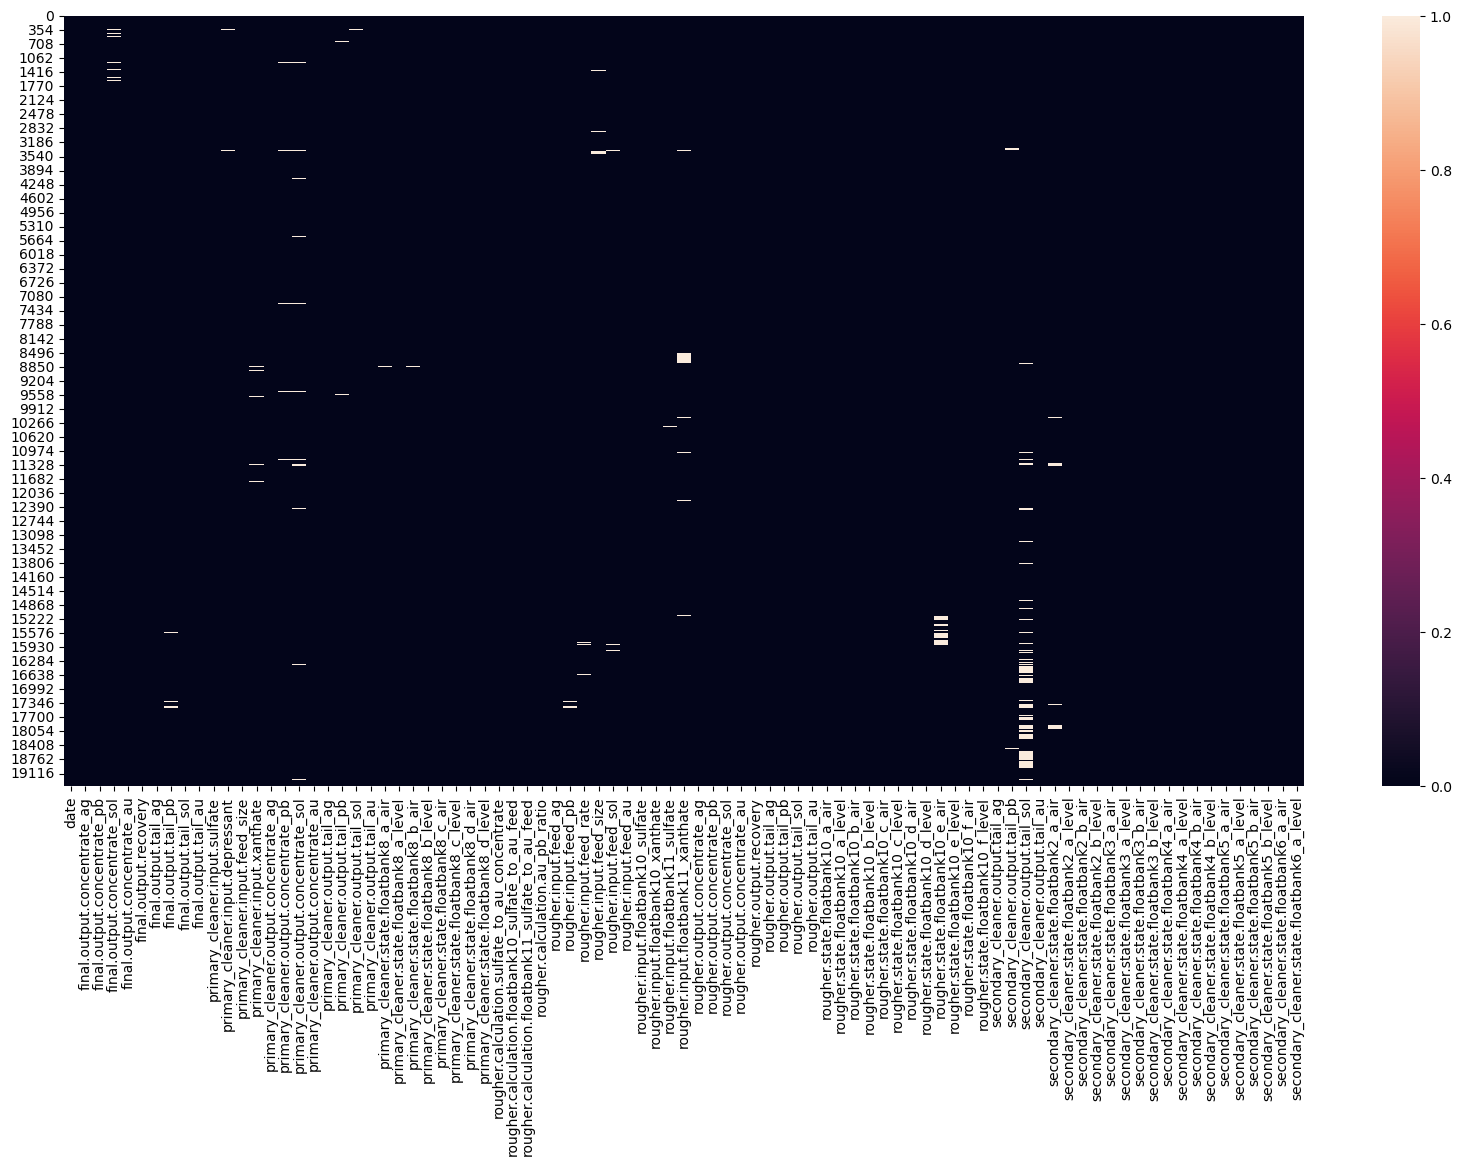

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(full.isna())
plt.show()

Нет, никаких взаимосвязей пропусков нет.

Заполним пропуска соседними значениями по дате, для этого надо:
- тип столбца с датой преобразовать в нормальный
- отсортировать датасет по дате
- заполнить пропуска в общем датасете методом interpolate(method='nearest')
- достать из общего датасета строки, которые должны быть в трейне

In [11]:
# приводим к нормальному типу
train['date'] = pd.to_datetime(train['date'], errors='coerce')
# заодно и в основном датасете
full['date'] = pd.to_datetime(full['date'], errors='coerce')
#print(train['date'].head()) #проверка

# проверим, повторяются ли даты. Если нет, то можно надергать из заполненного датафрейма строки, ориентируясь на даты
print ('количество дубликатов дат в полном датафрейме:', full['date'].duplicated().sum())

#сортируем датасет по дате
full = full.sort_values(by='date')

full_interpolated = full.copy()

# заполняем пропуски
for col in full.columns[1:]:
    full_interpolated[col] = full[col].interpolate(method='nearest')
    

количество дубликатов дат в полном датафрейме: 0


Необходимо проверить, не изменились ли сильно распределения величин, после заполнения пропусков

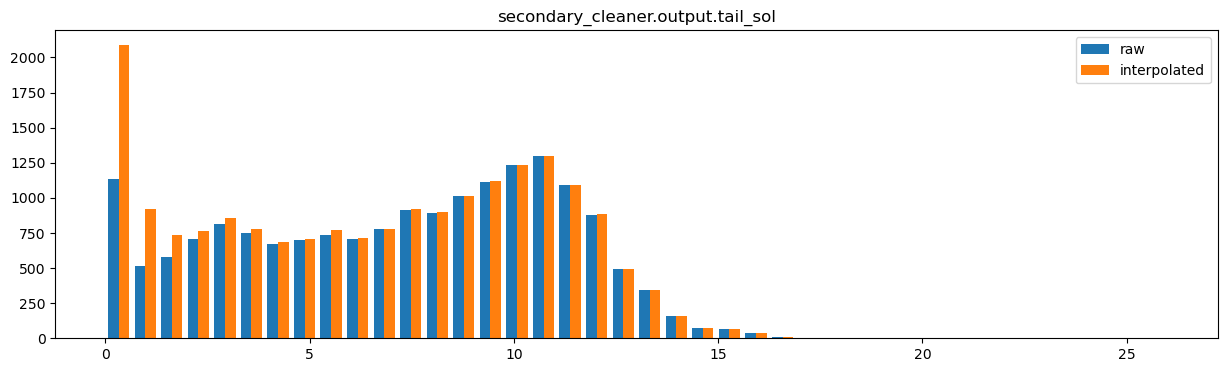

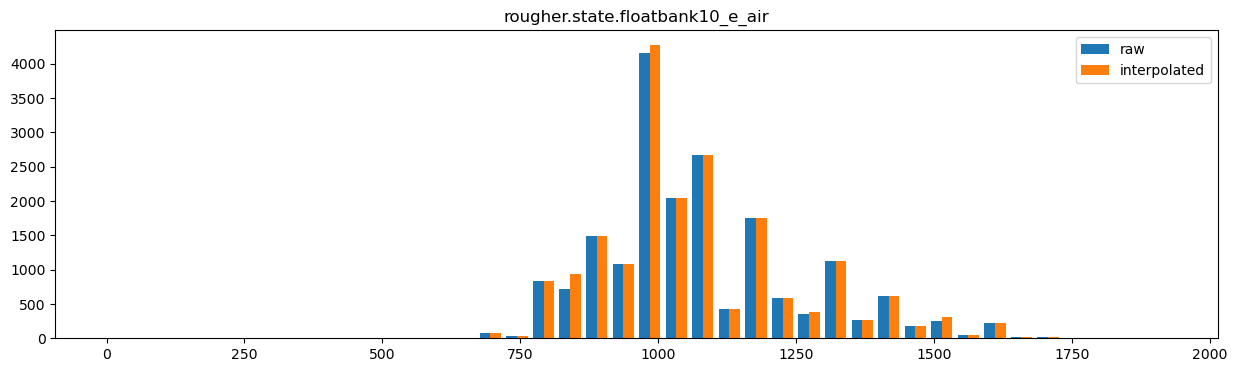

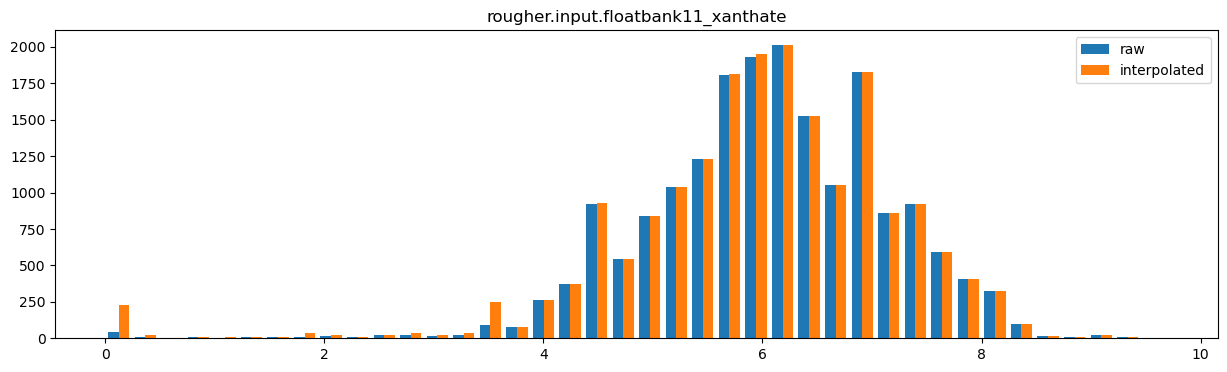

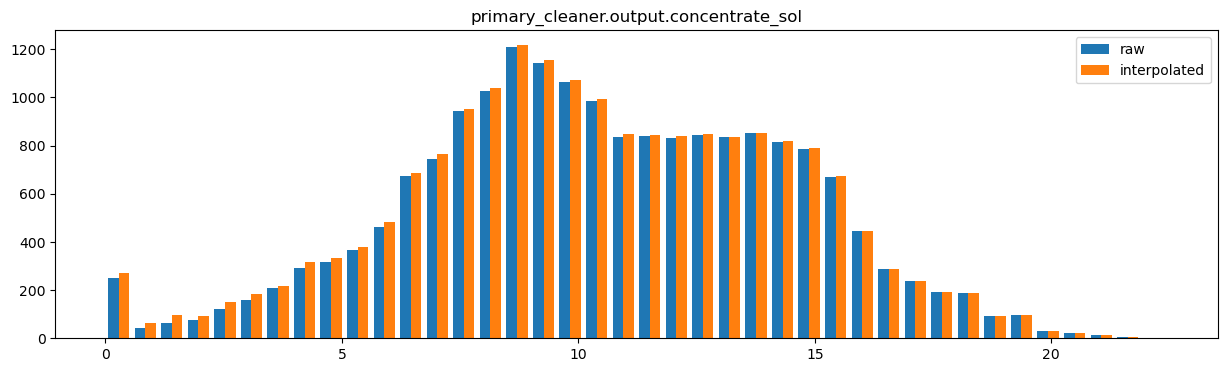

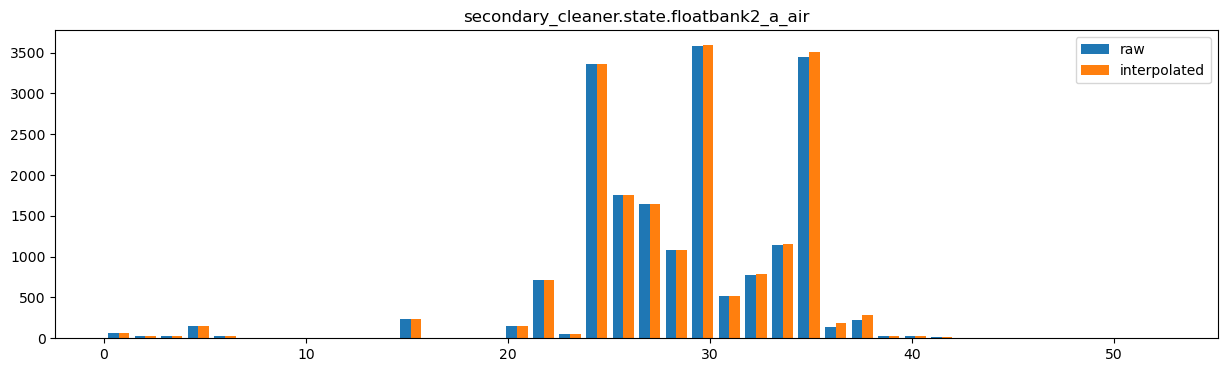

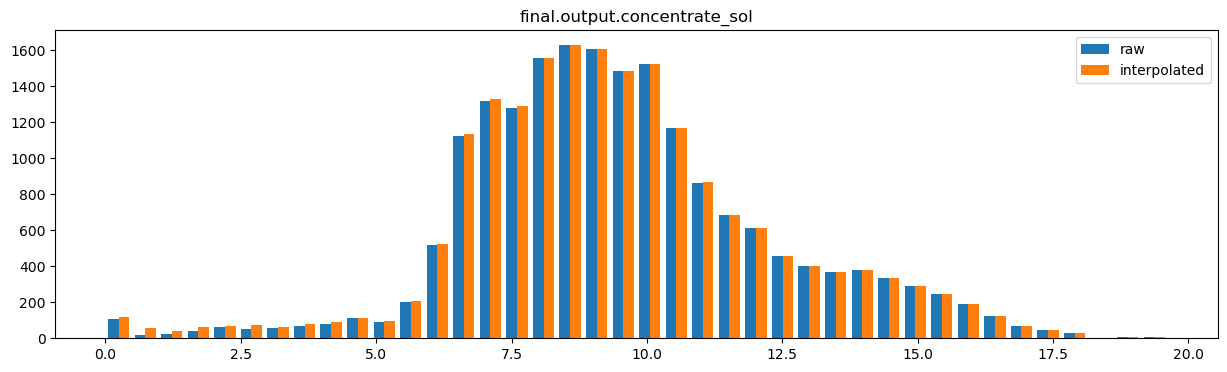

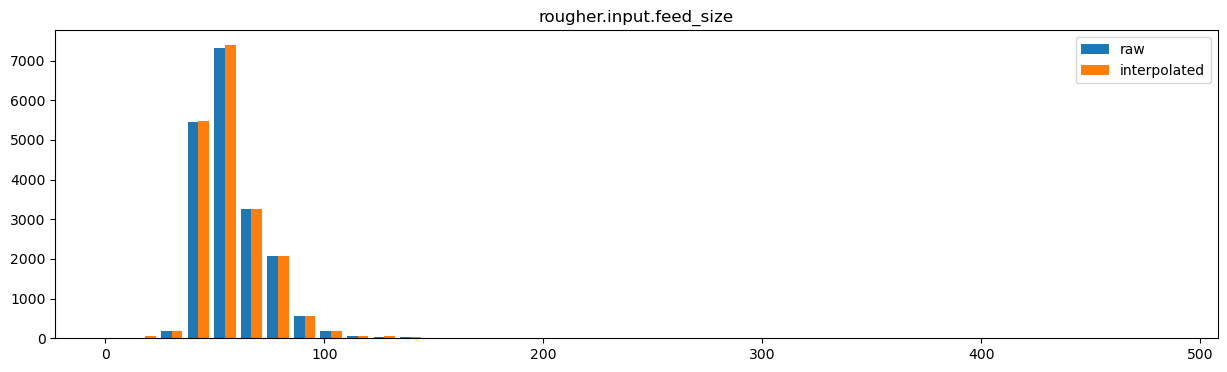

In [12]:
for col in top_defective_columns:
    plt.figure(figsize=(15,4))
    plt.hist([full[col], full_interpolated[col]], bins=40, label=['raw', 'interpolated'])
    plt.legend()
    plt.title(col)
    plt.show()

Терпимо. 
ненормальные выбросы около нуля - явные аномалии. Можно было бы их удалить, но большого смысла нет т.к. все равно эти данные потом не будут использоватсья для обучения моделей.
Остается надергать из заполненного датасета строки для тренировочного.

In [13]:
# надергаем из общего датасета то, что должно быть в трейне
train = full_interpolated[full_interpolated['date'].isin(list(train['date']))]

# заодно перезапишем исходный датасет, пусть тоже будет без пропусков
full = full_interpolated

Посмотрим распределение признаков. Признаки возьмем только те, что в тестовой выборке (остальные не будем использовать при оучении модели).

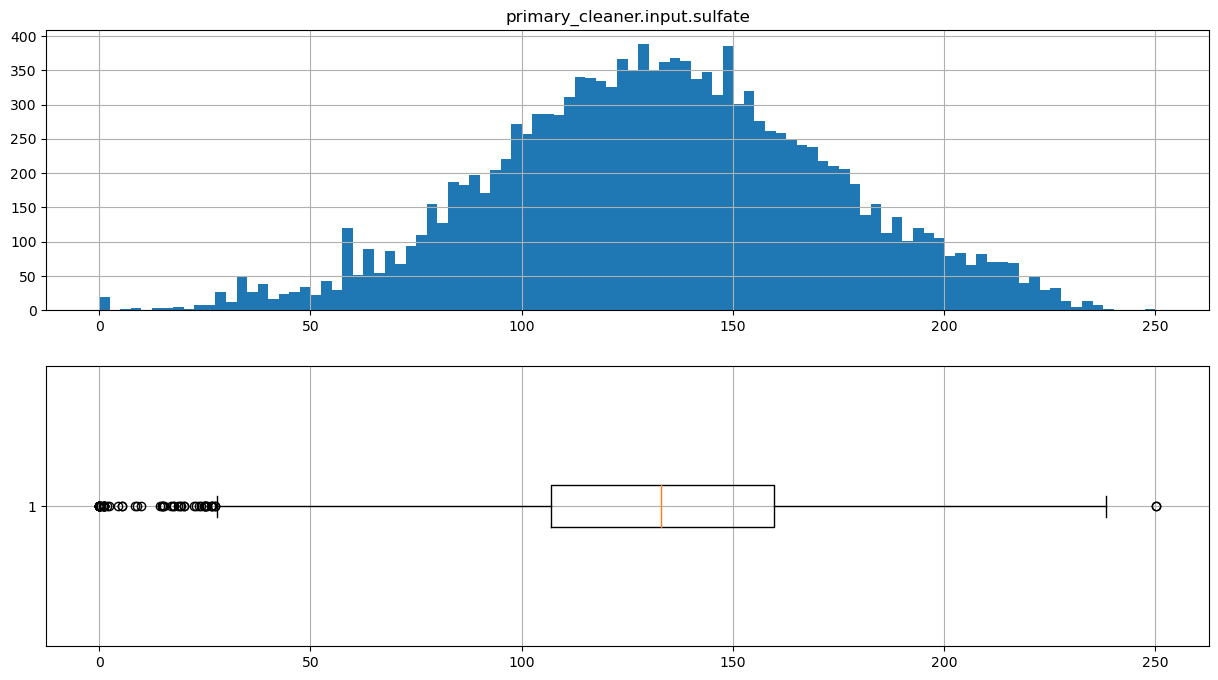

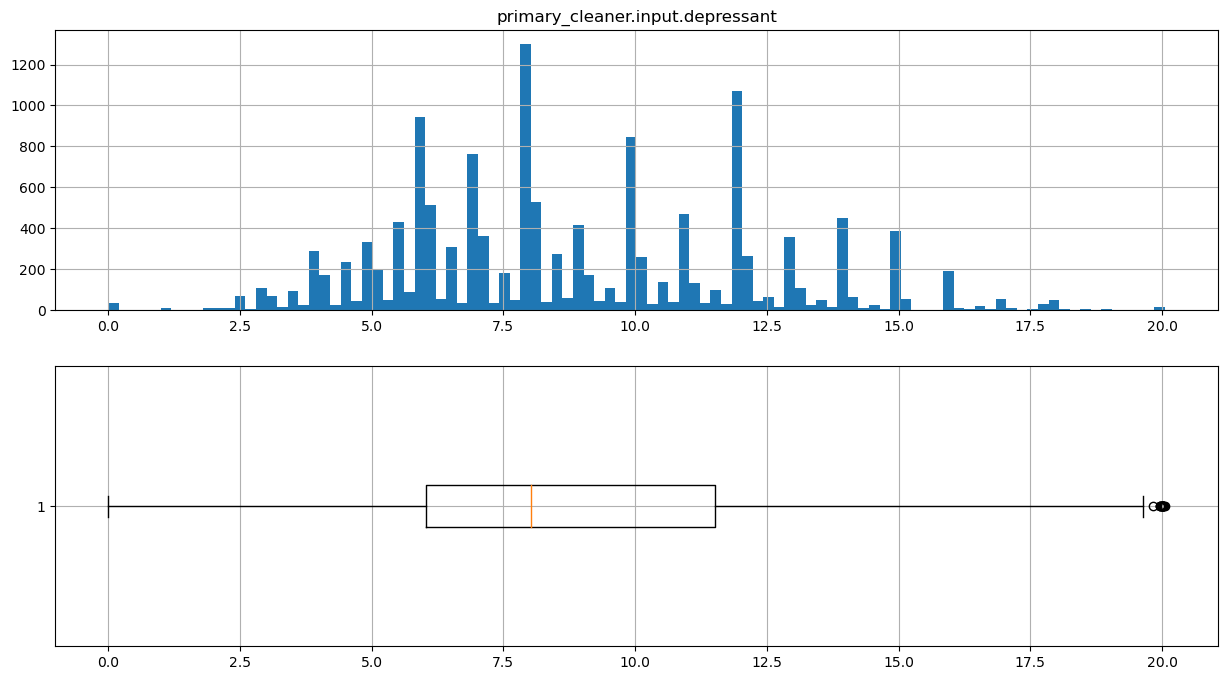

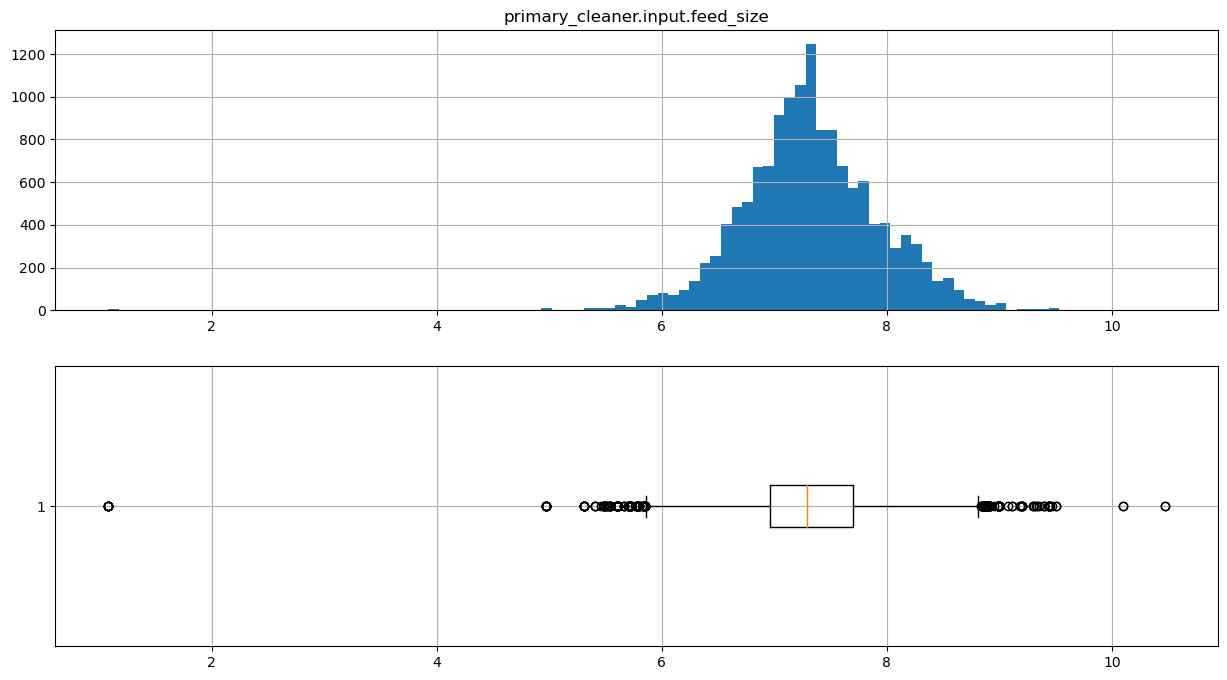

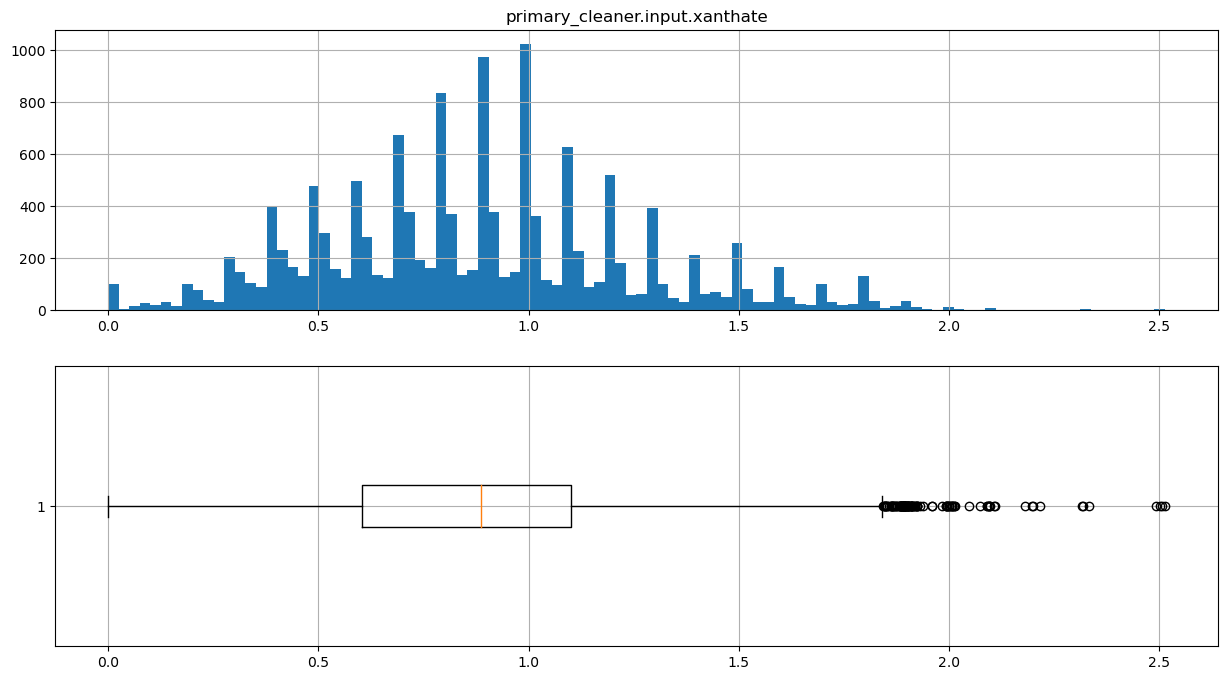

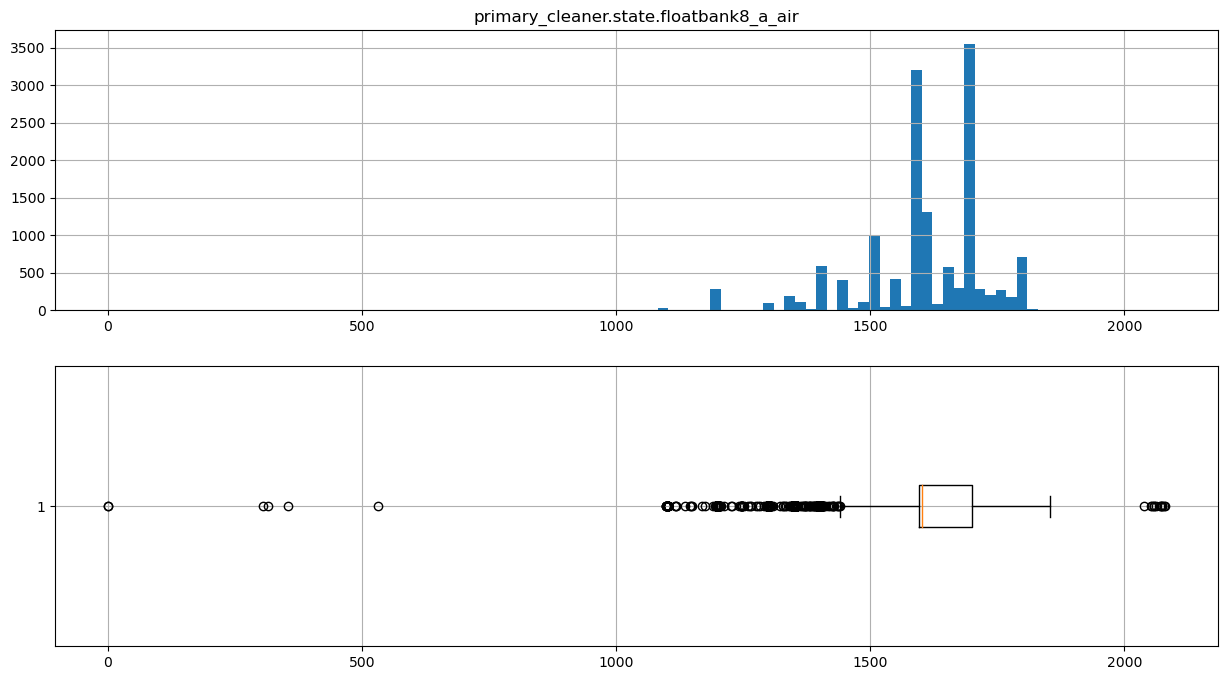

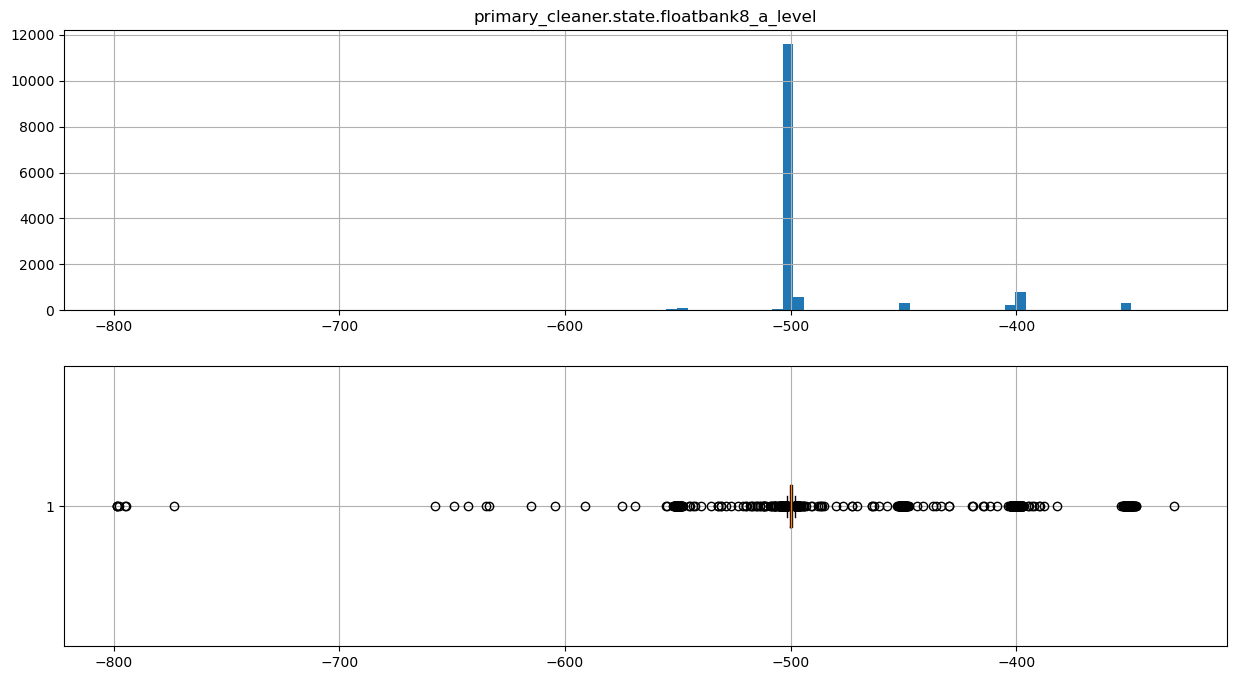

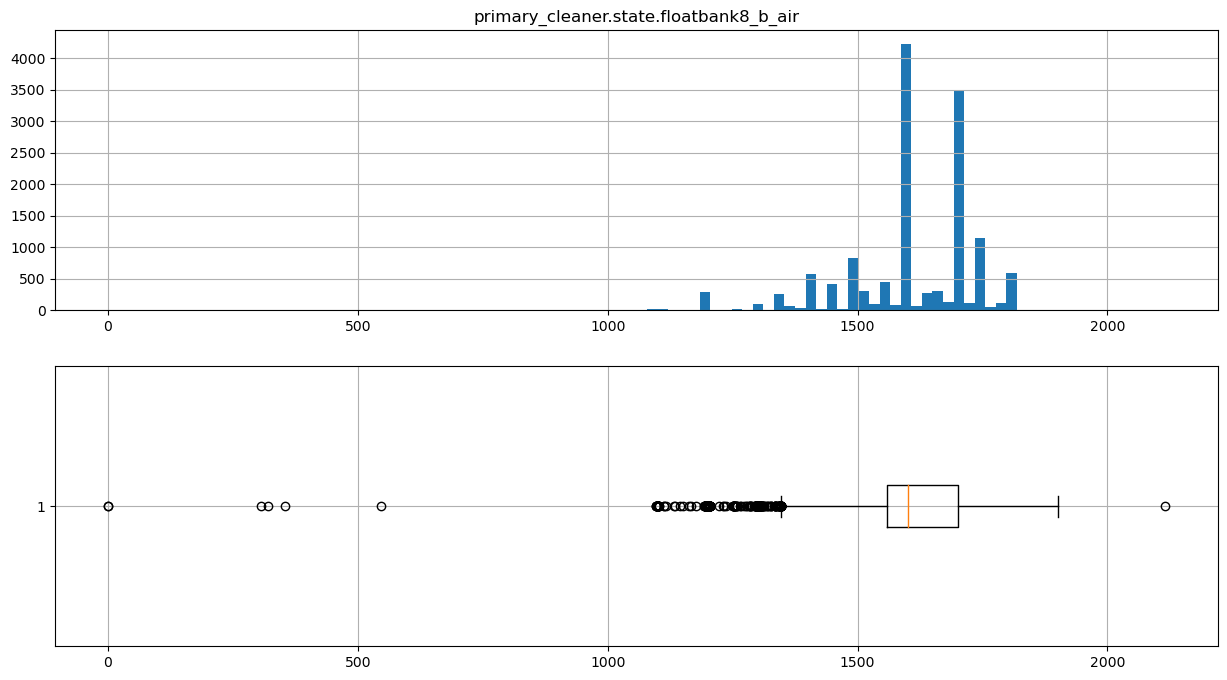

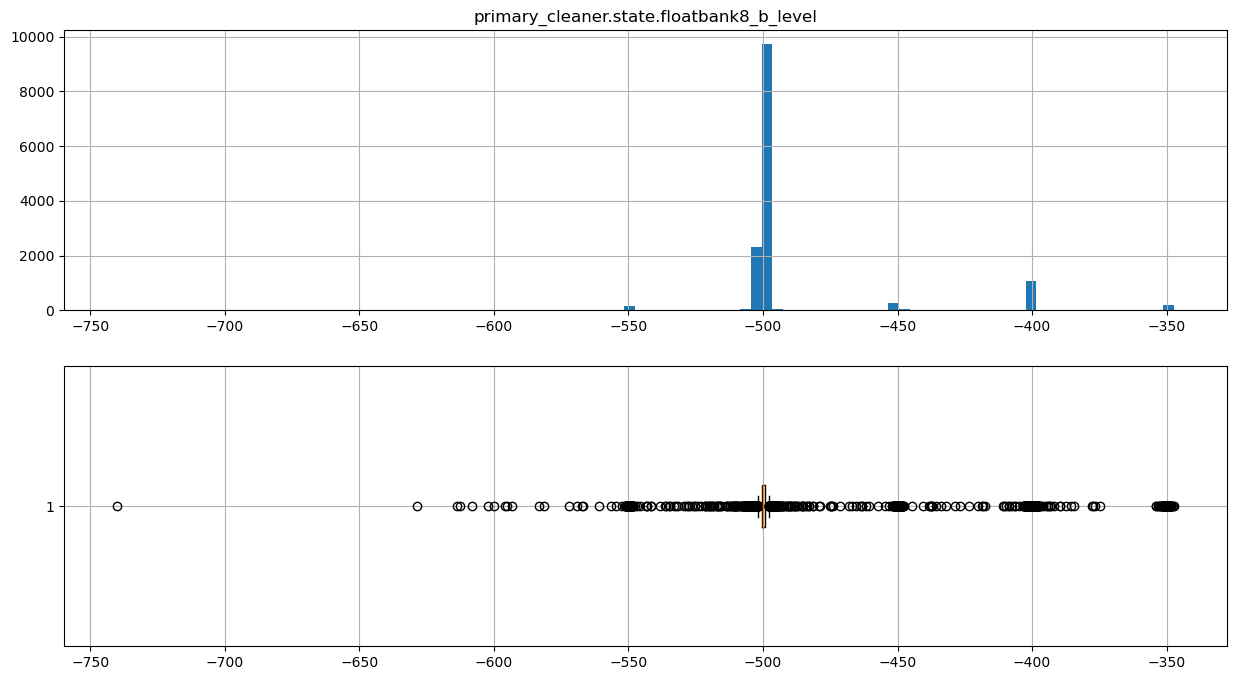

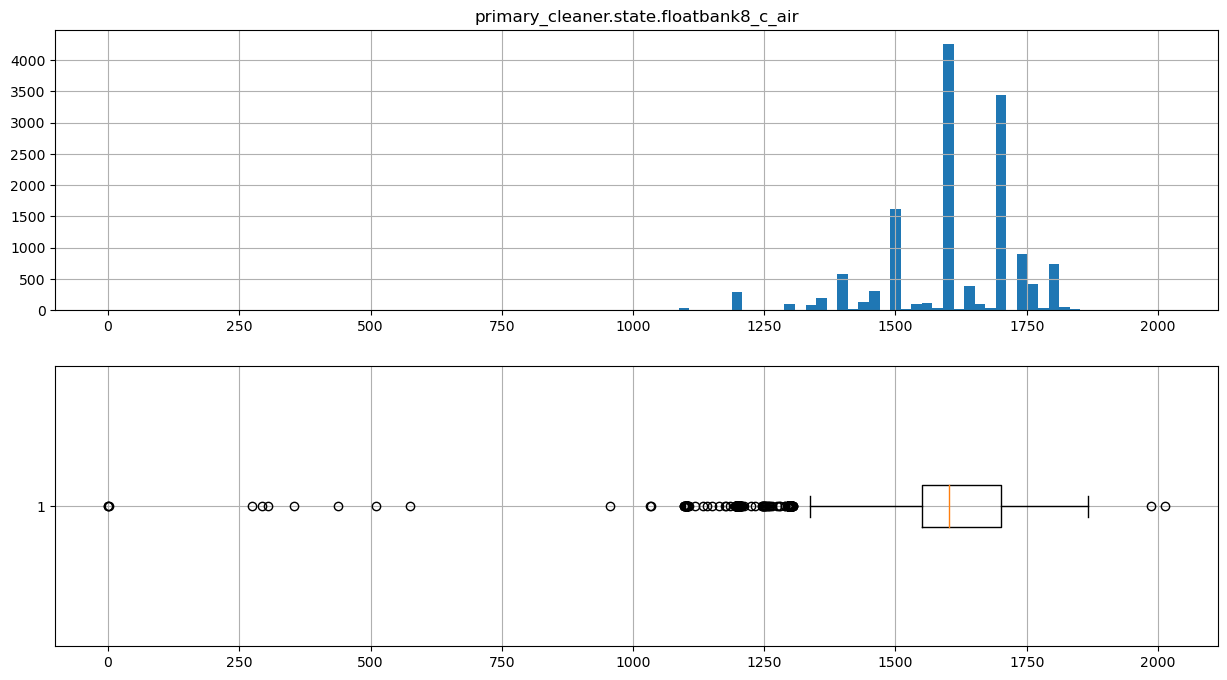

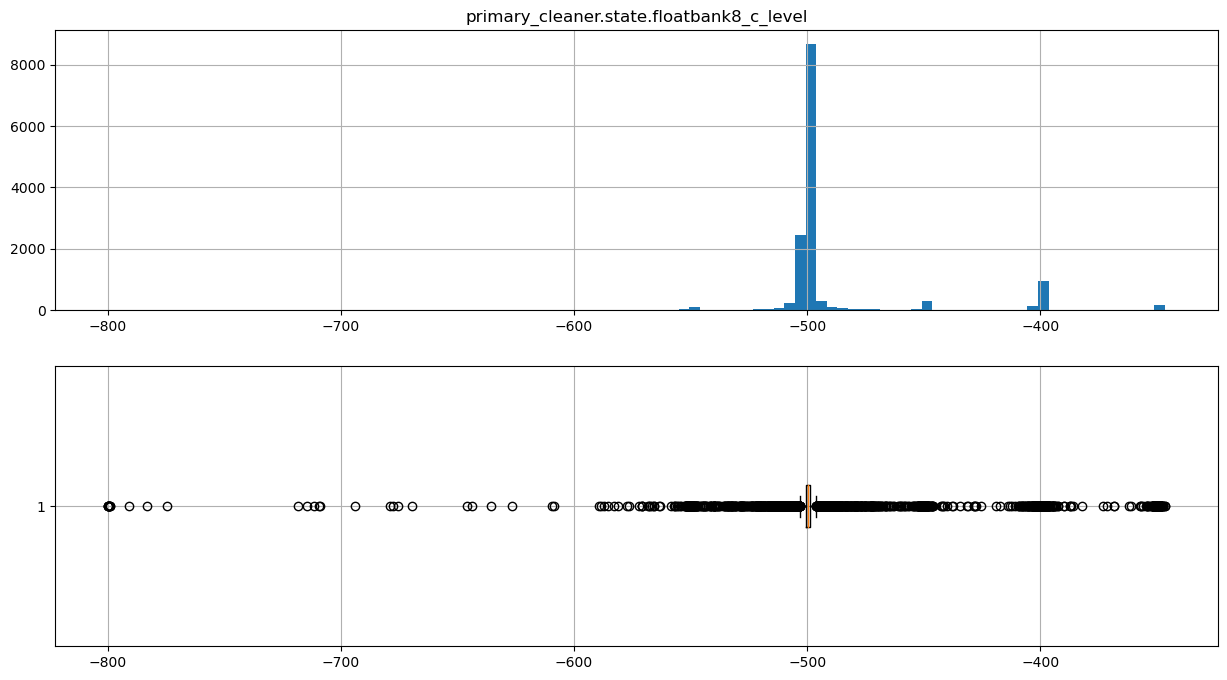

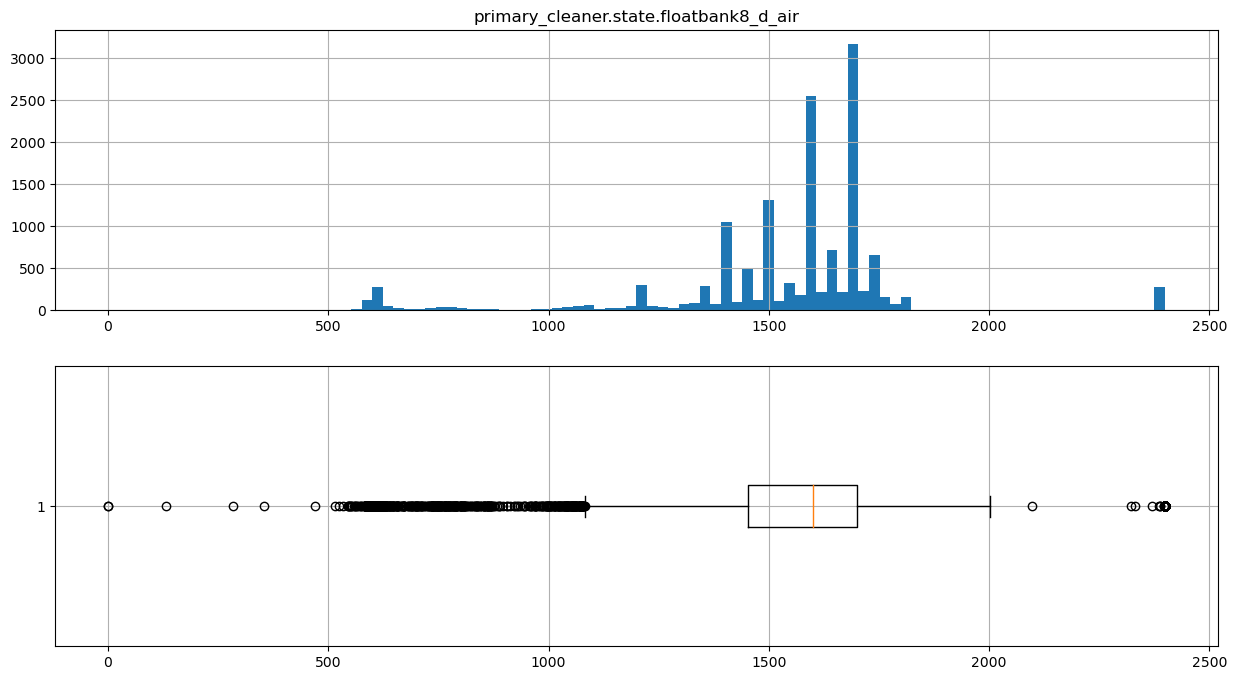

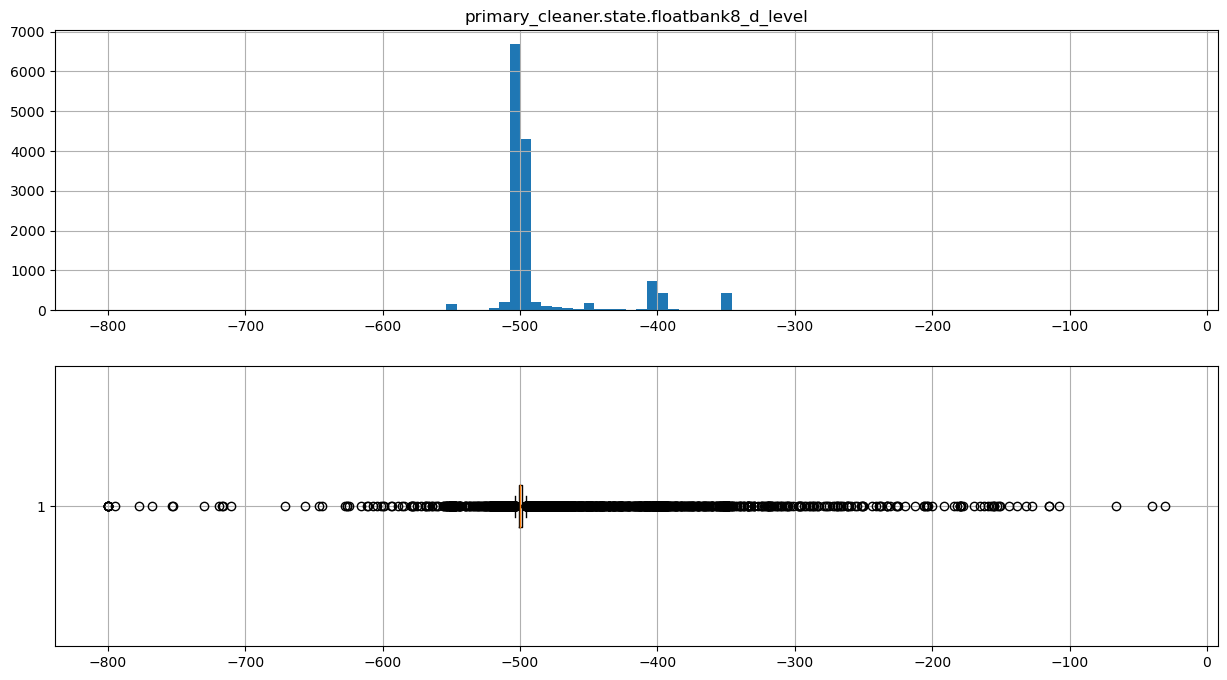

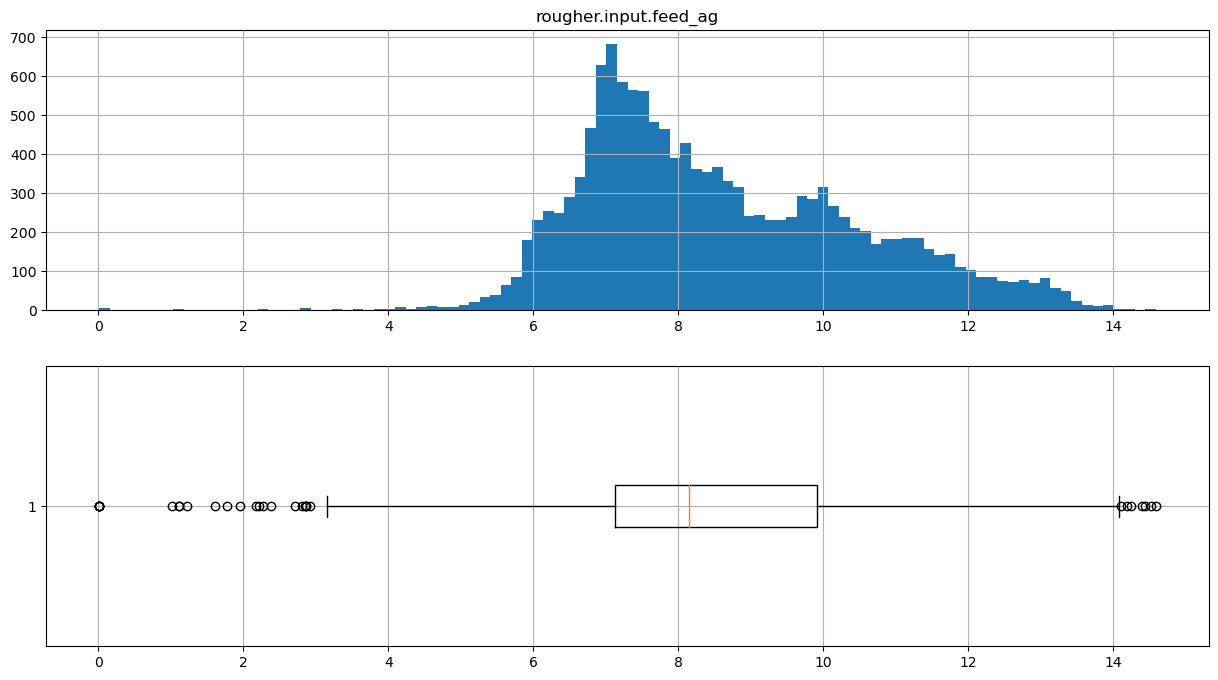

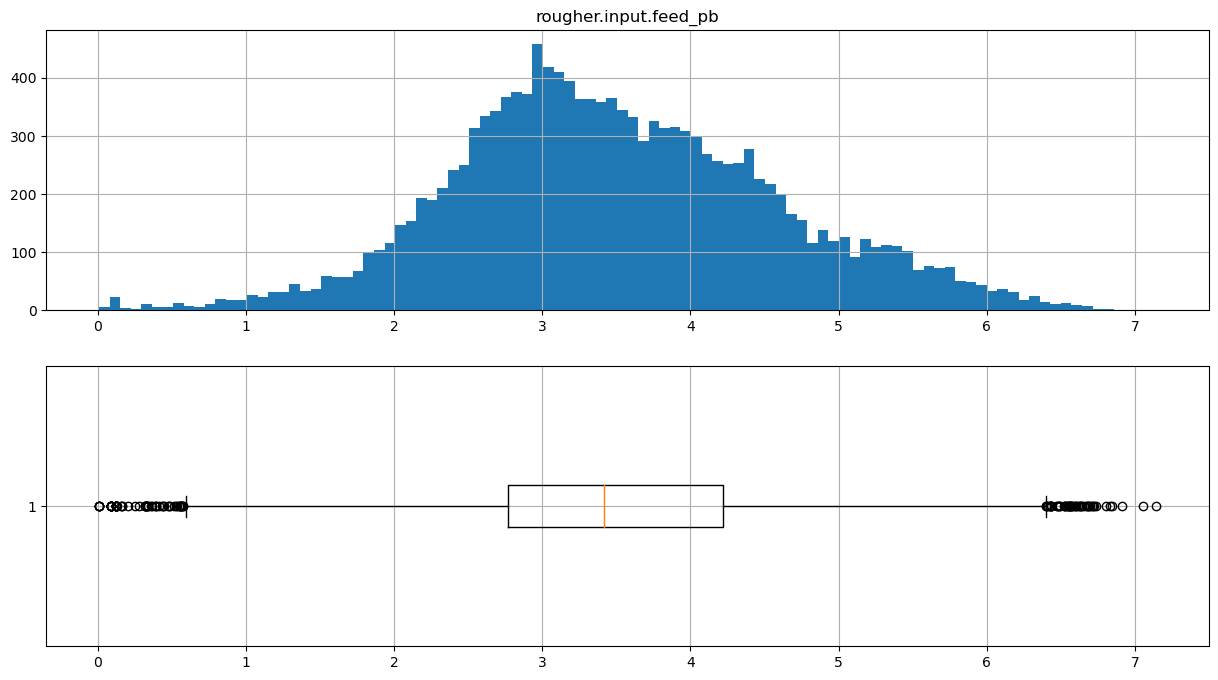

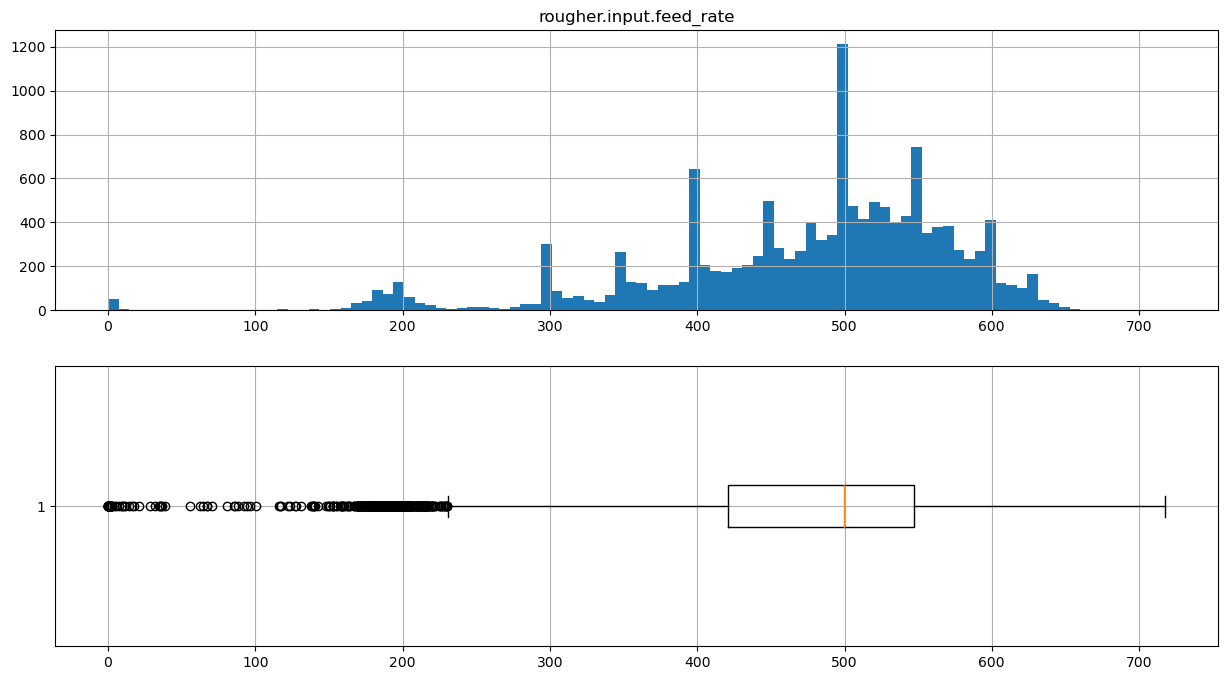

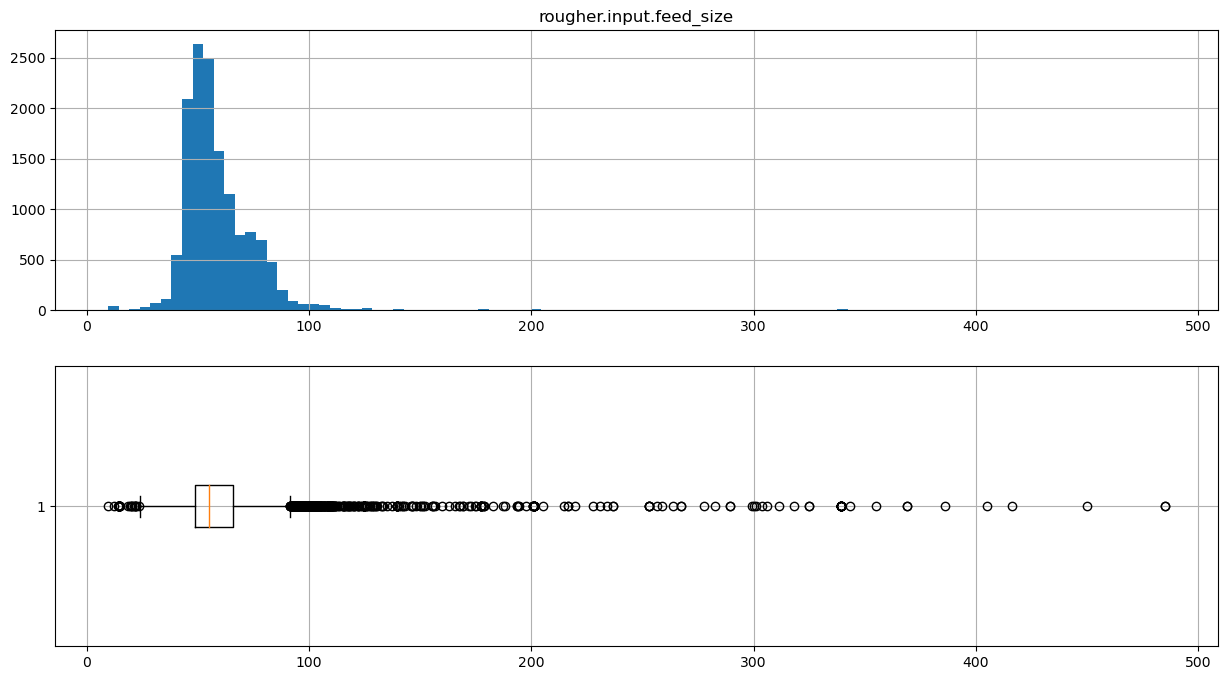

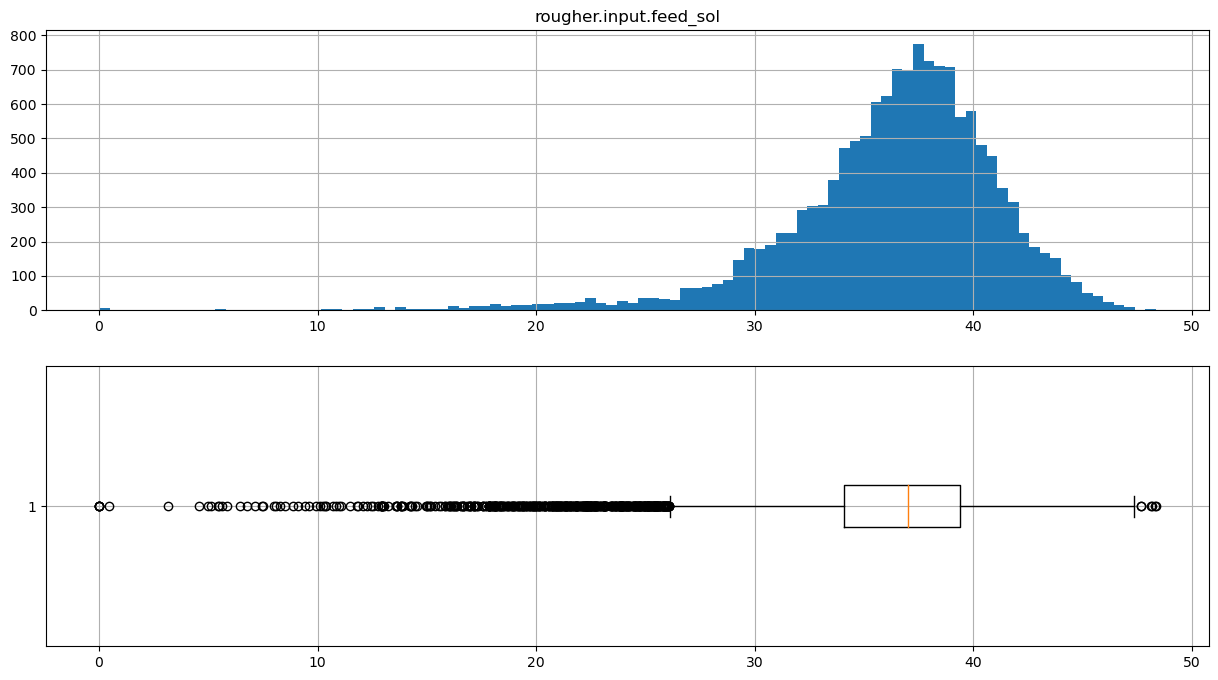

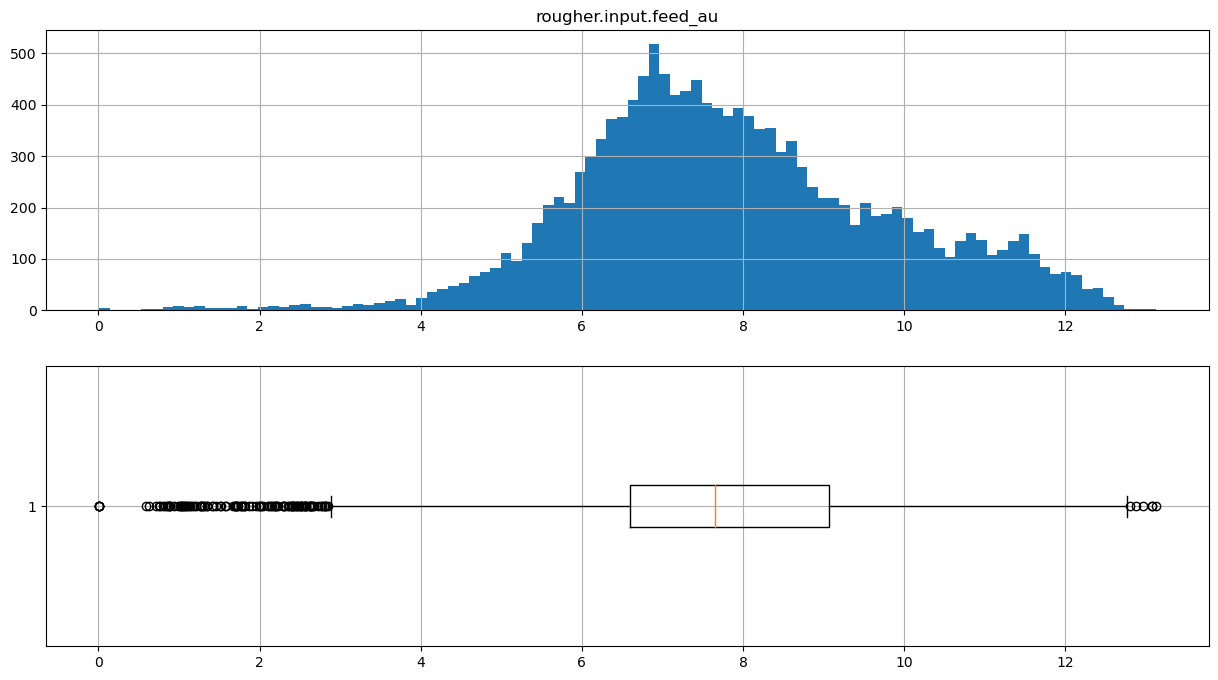

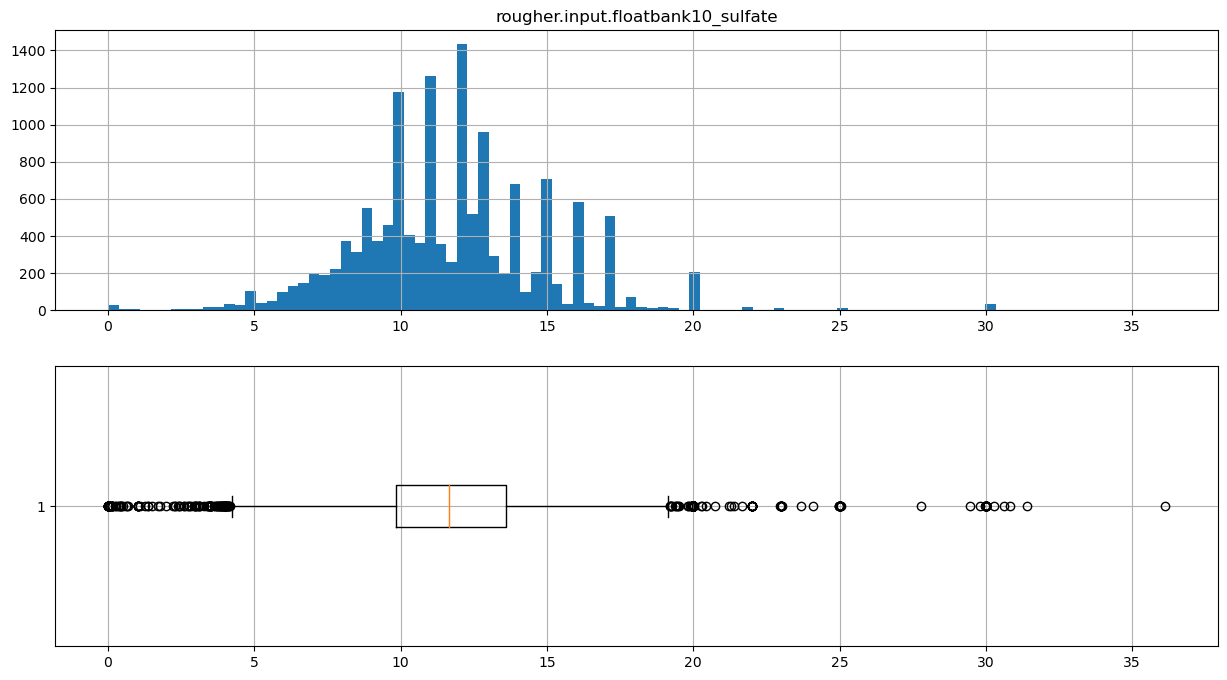

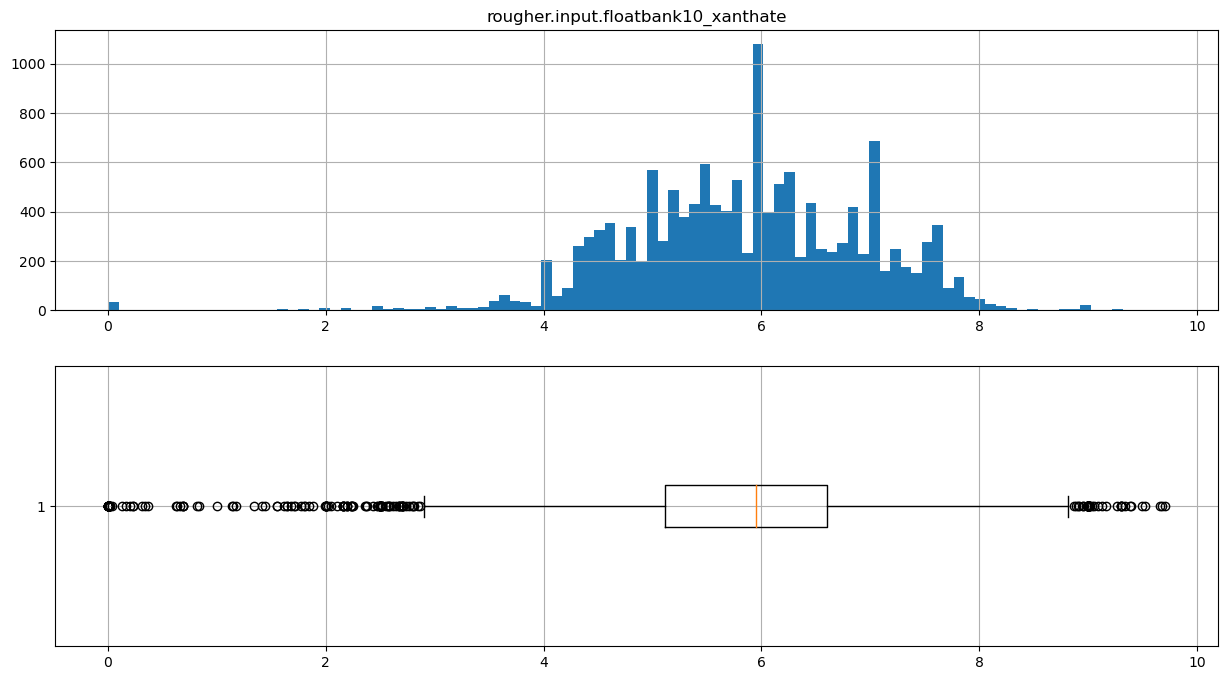

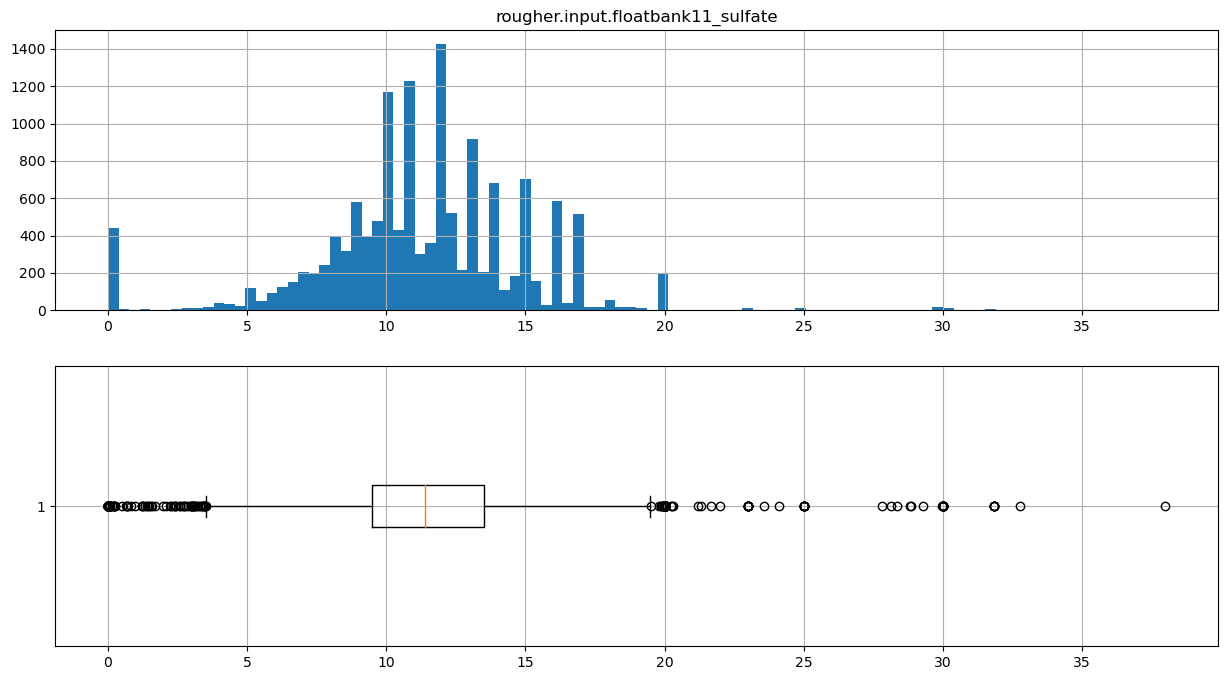

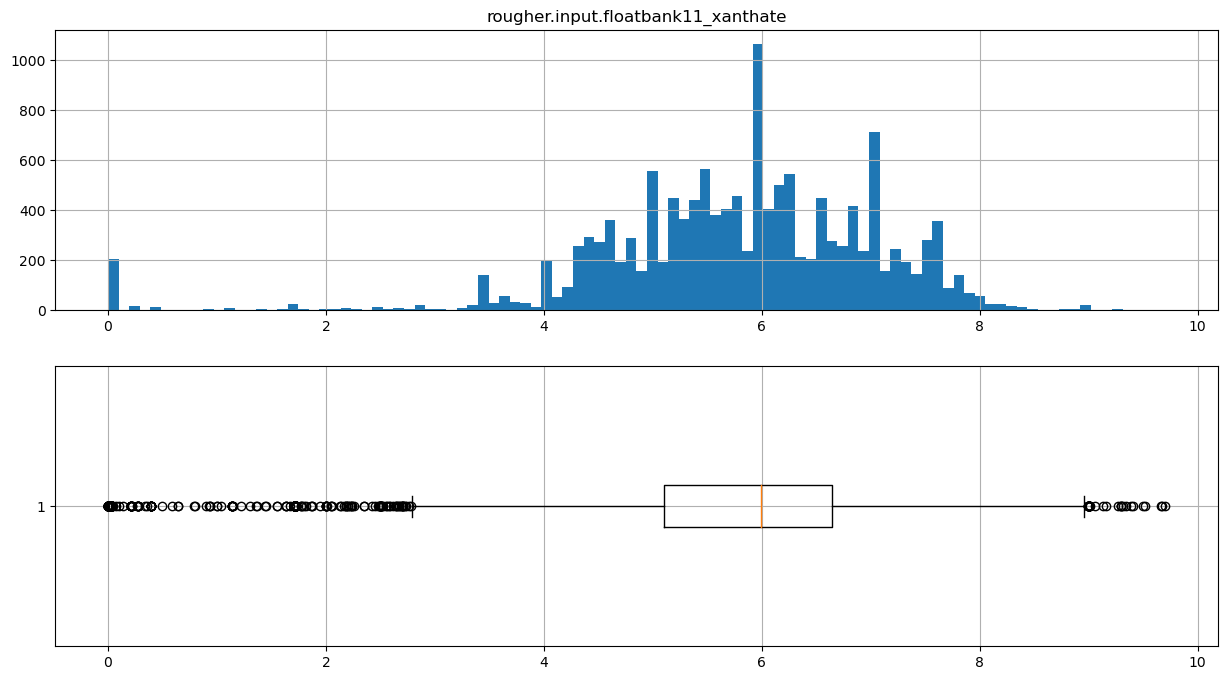

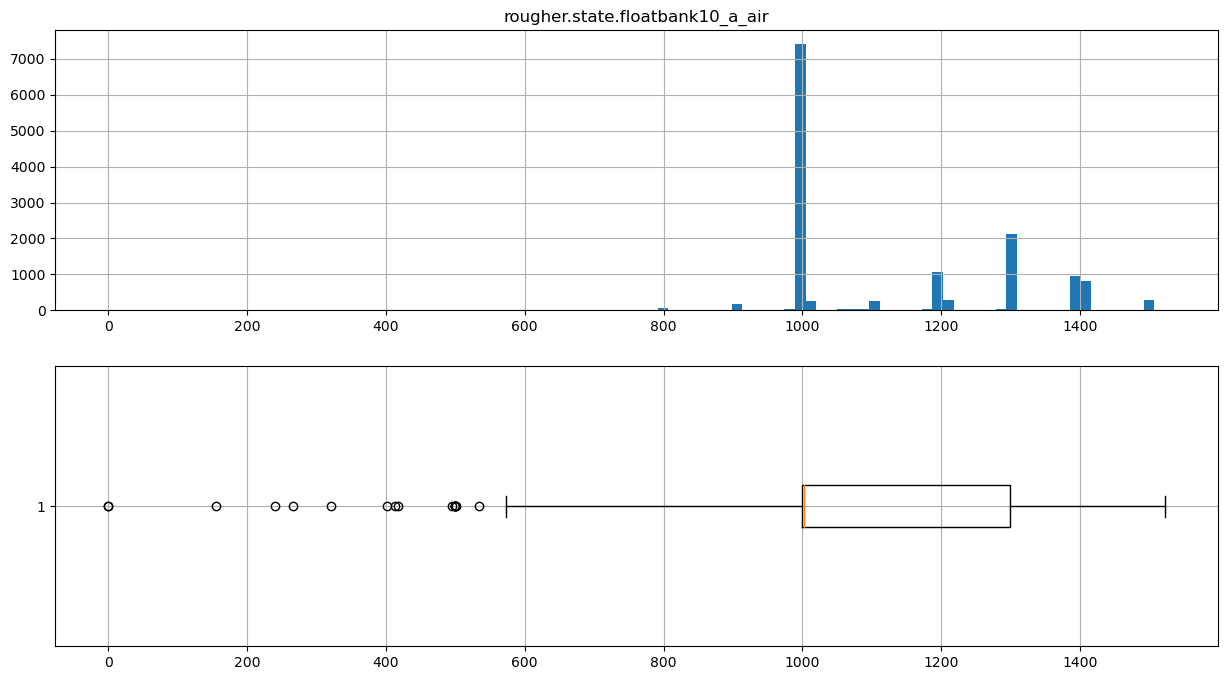

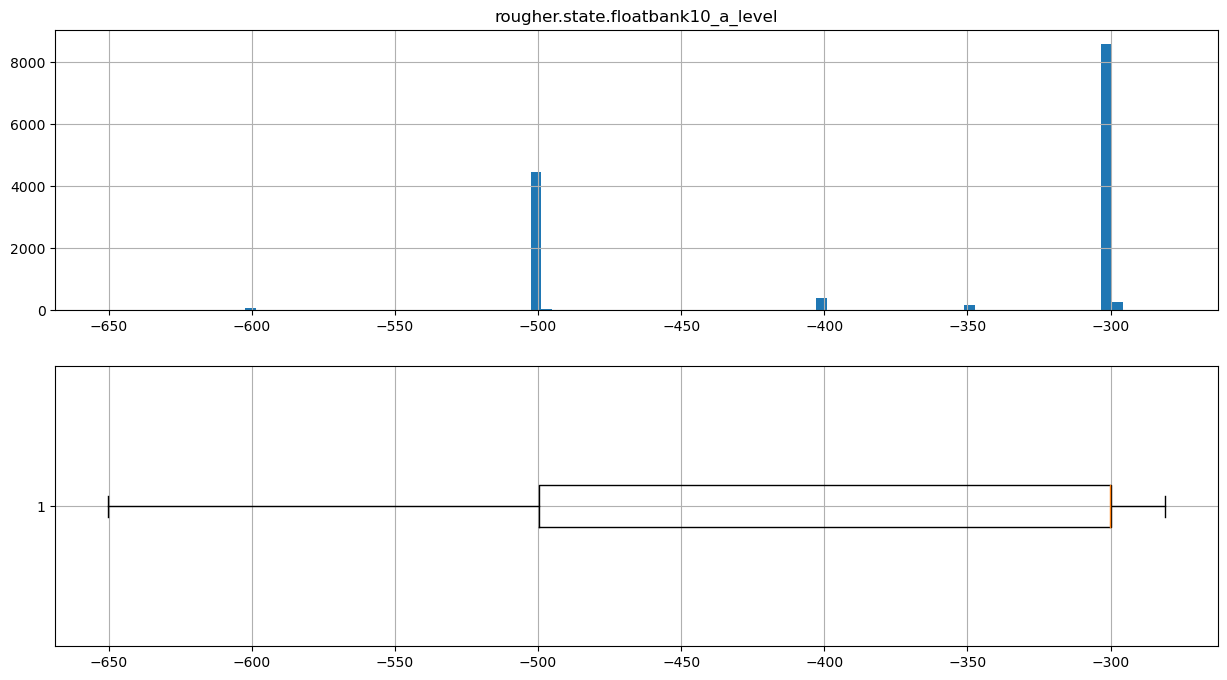

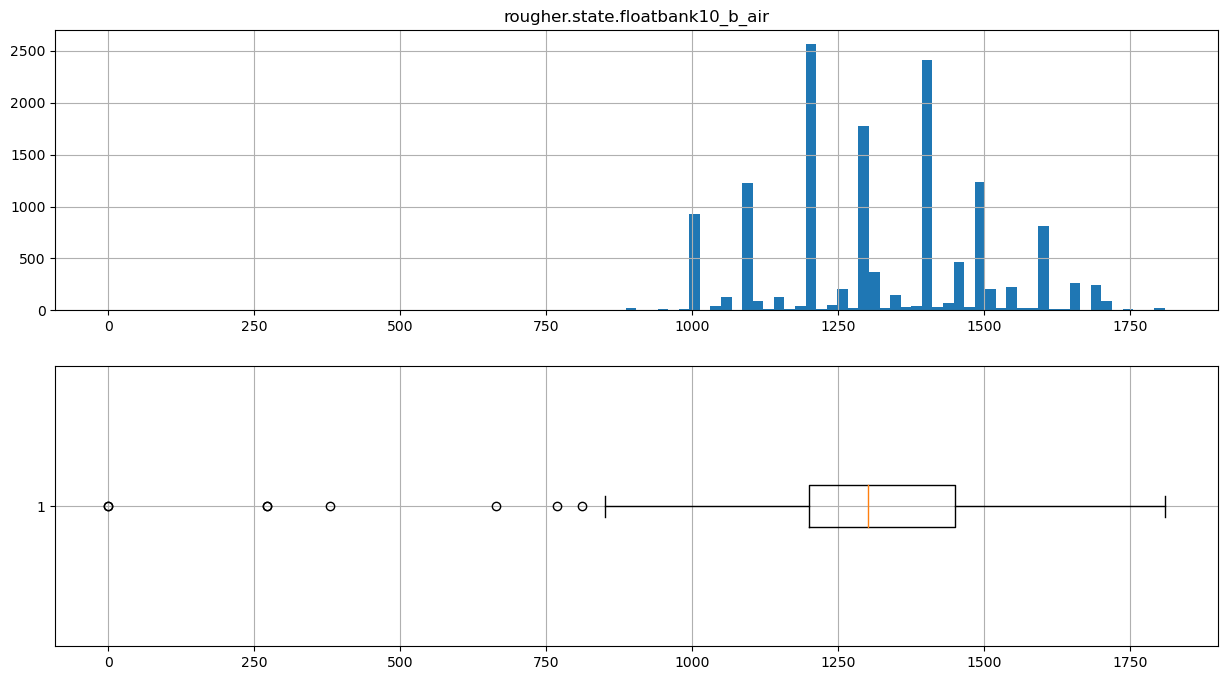

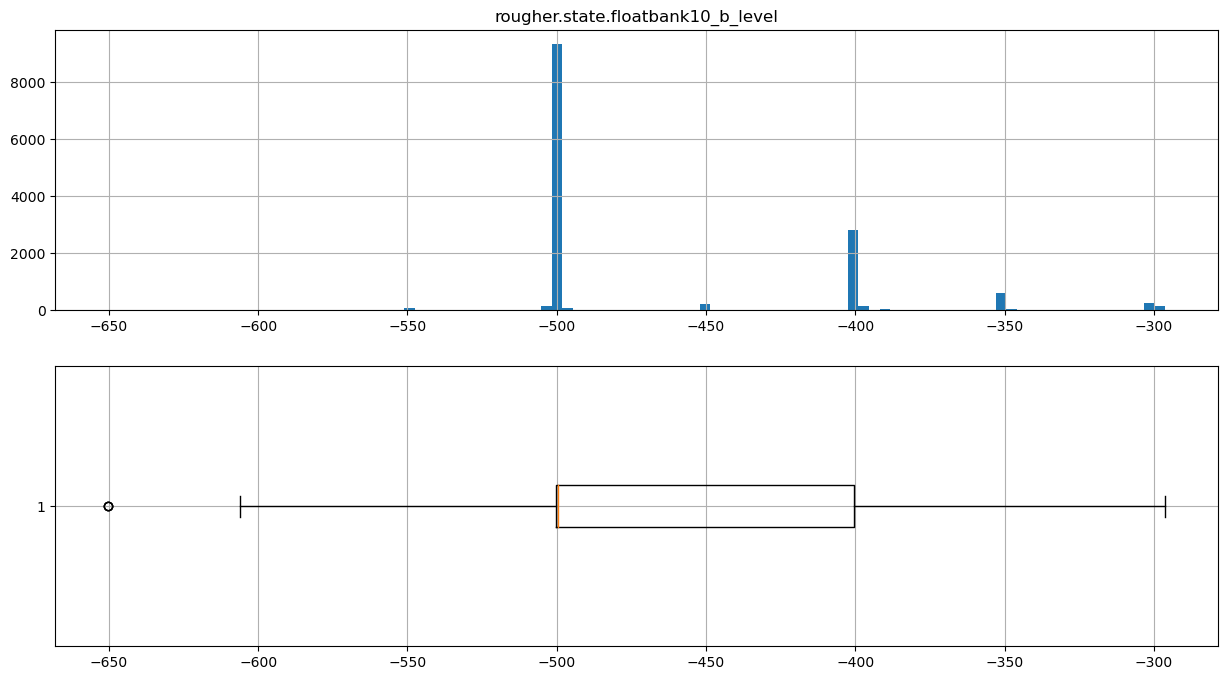

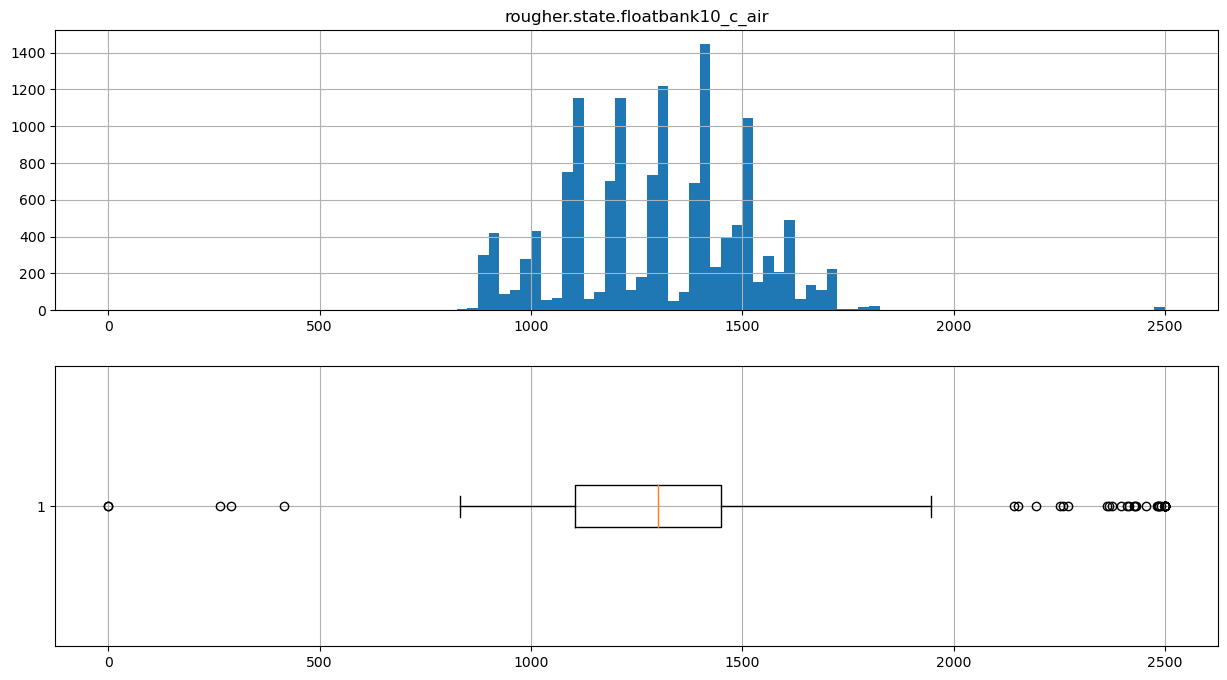

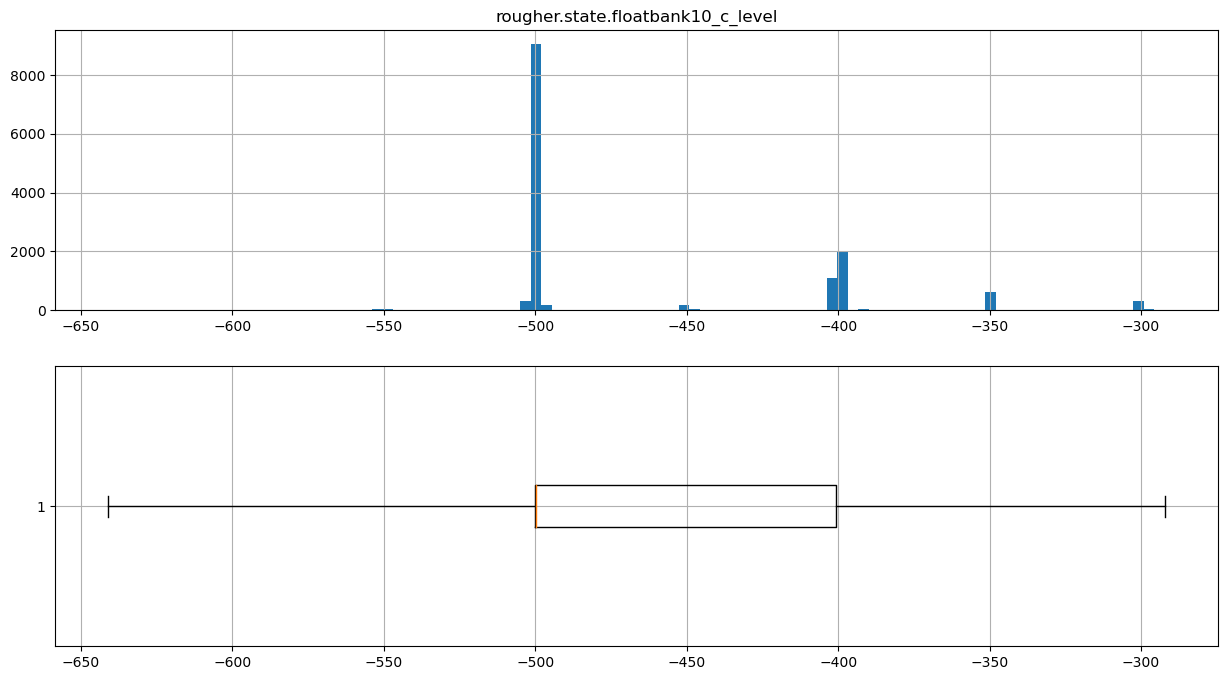

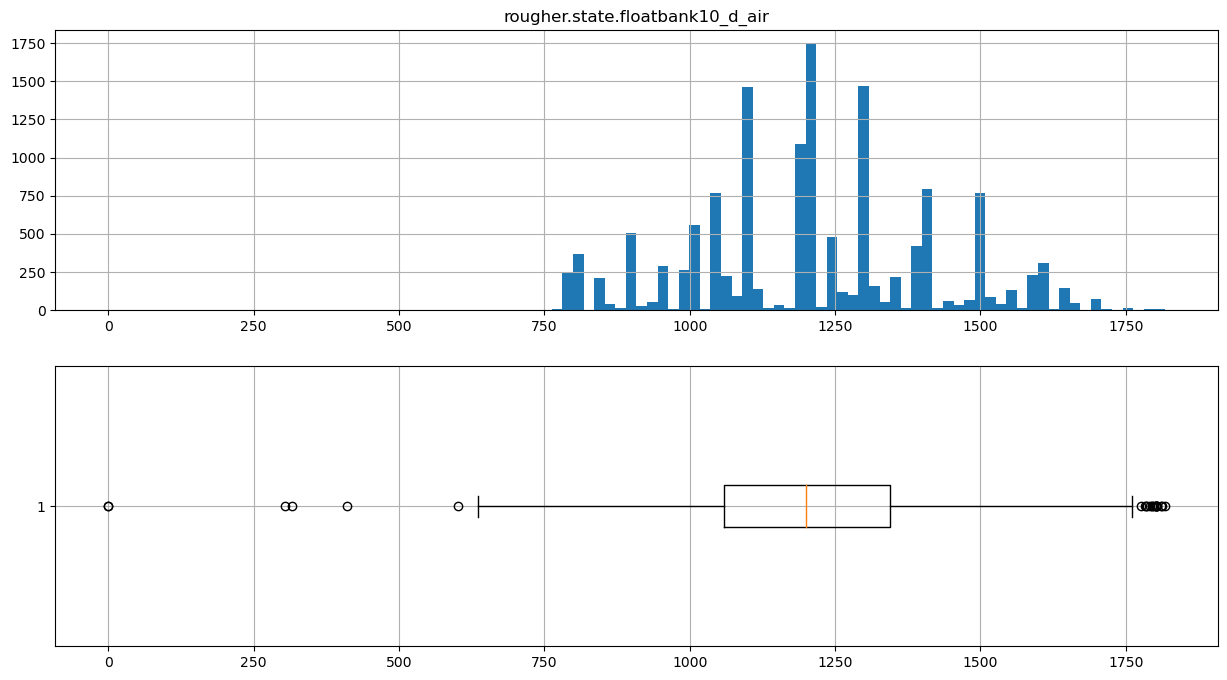

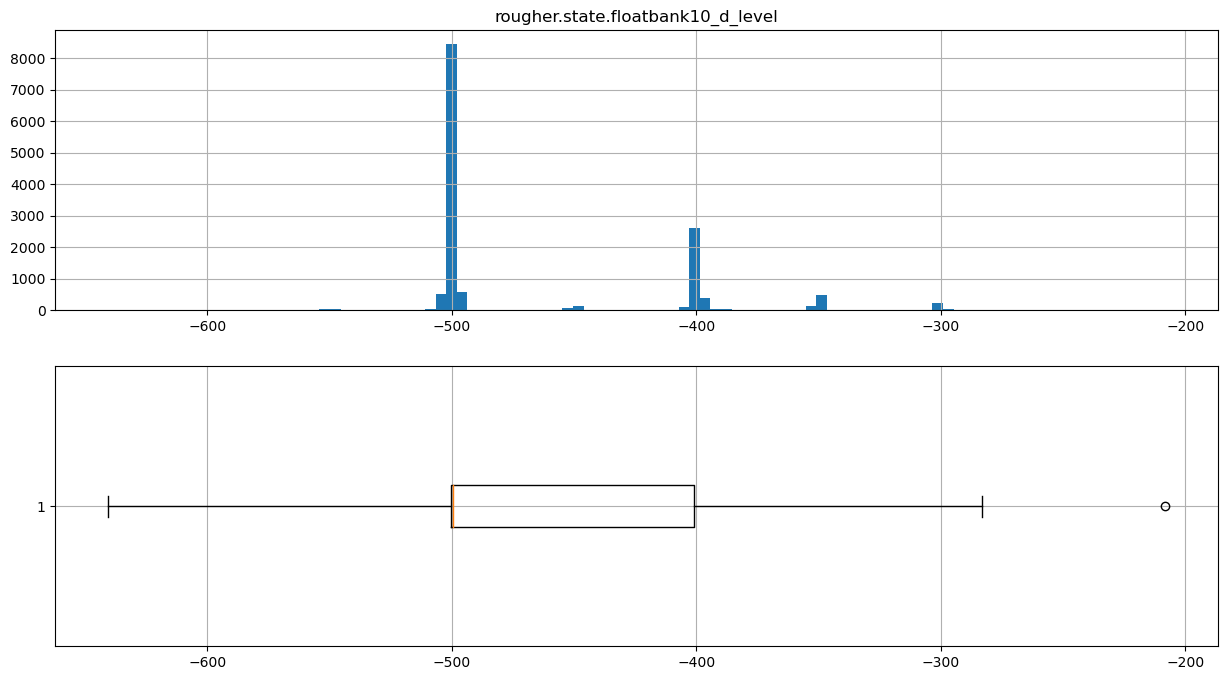

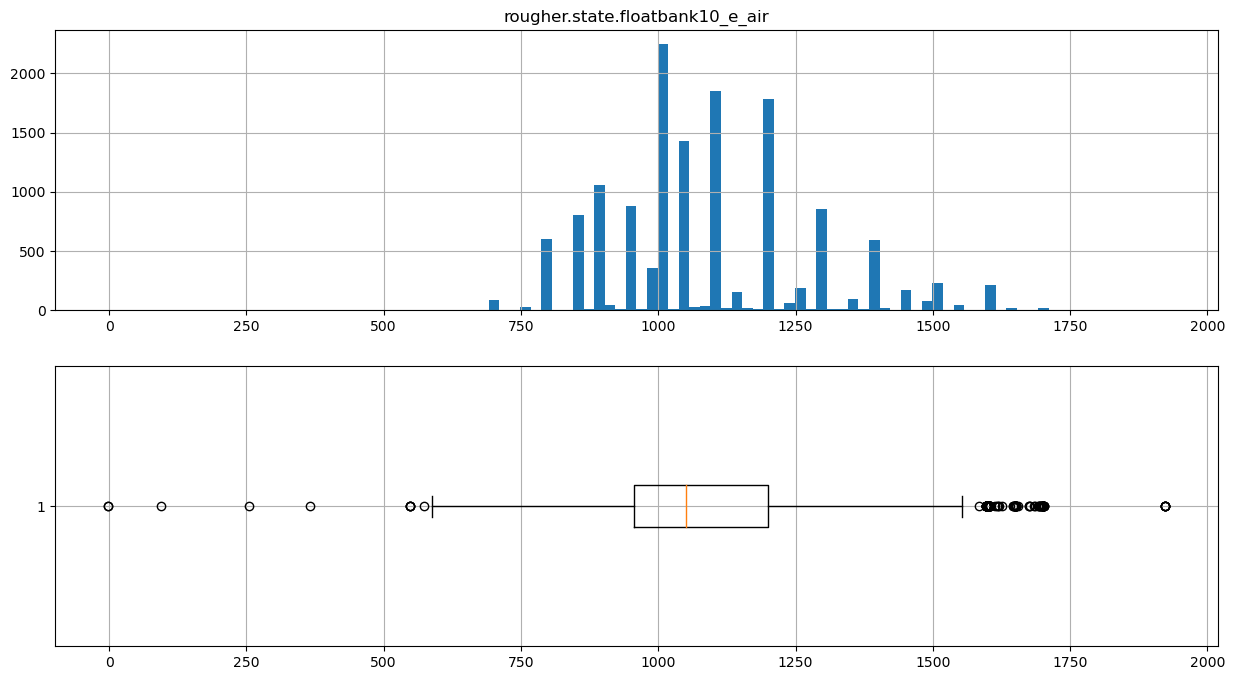

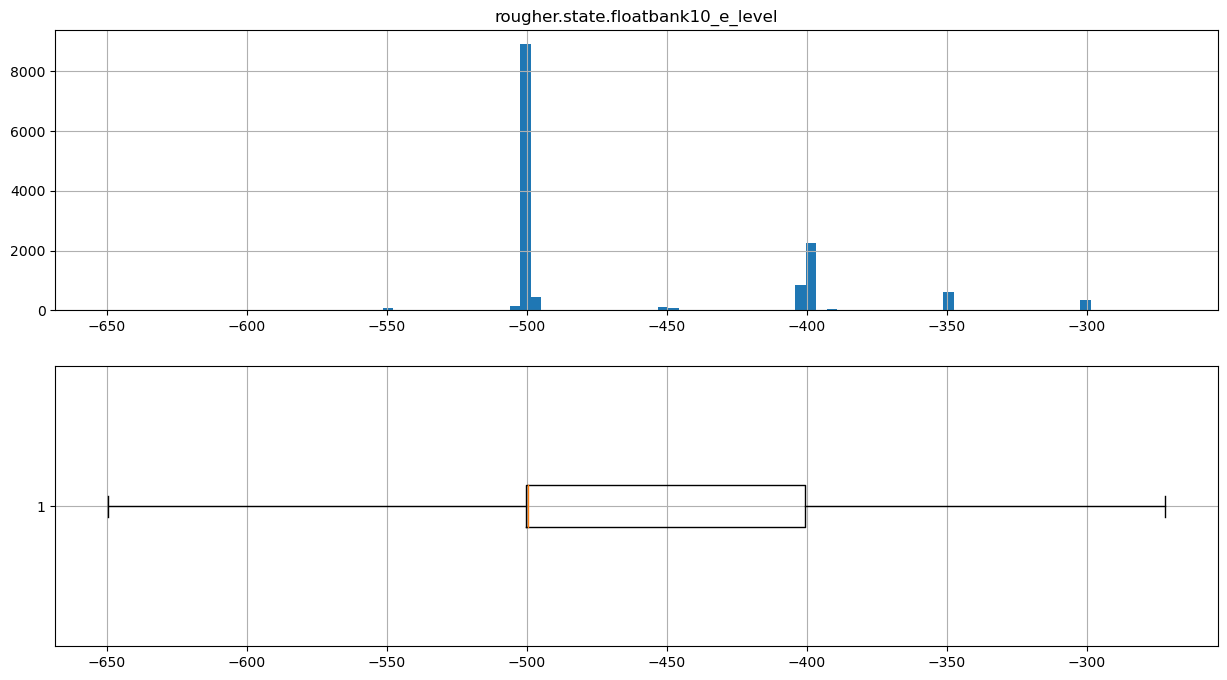

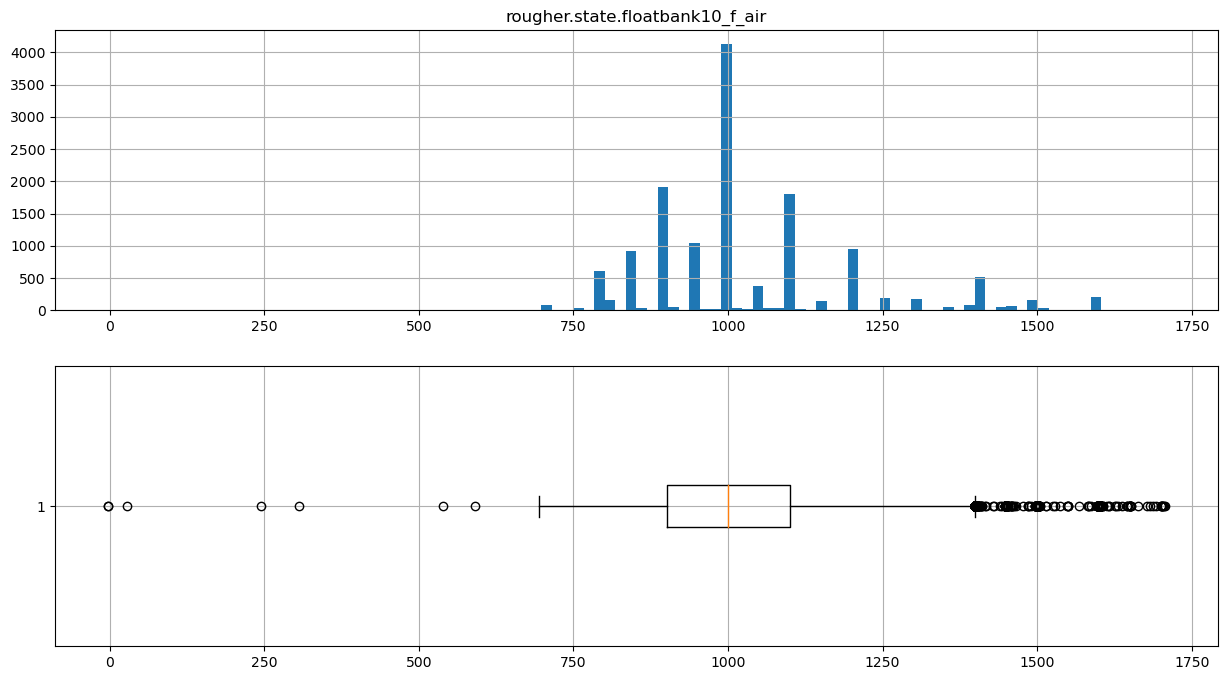

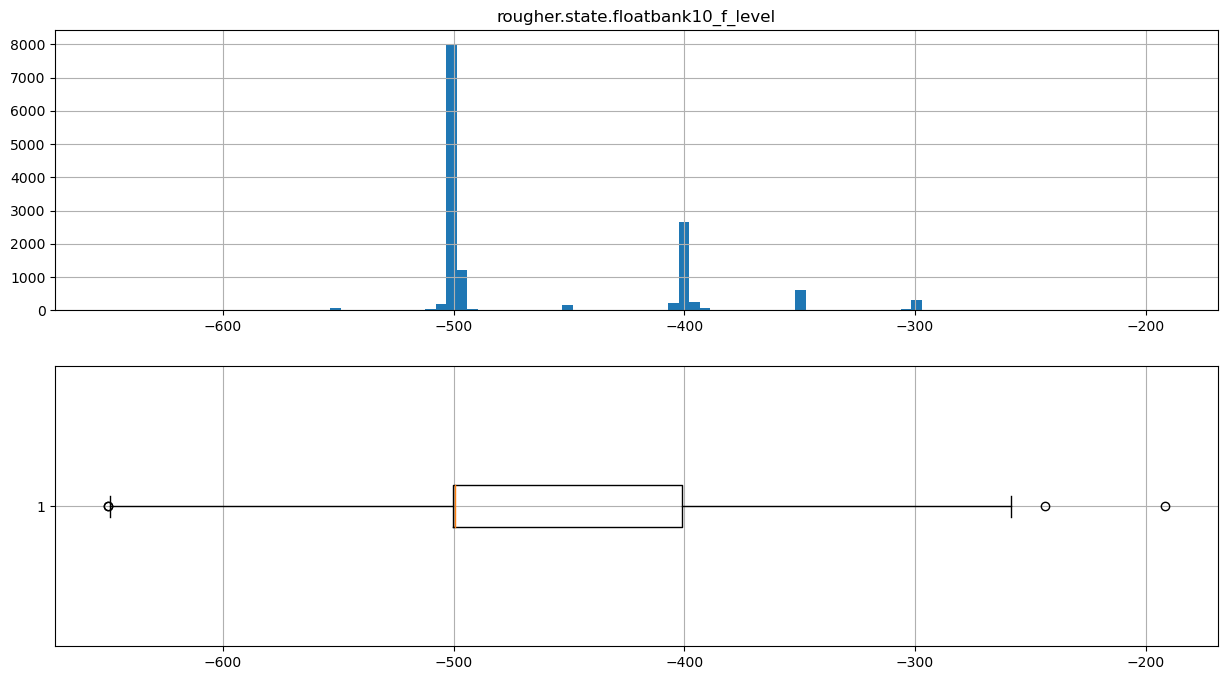

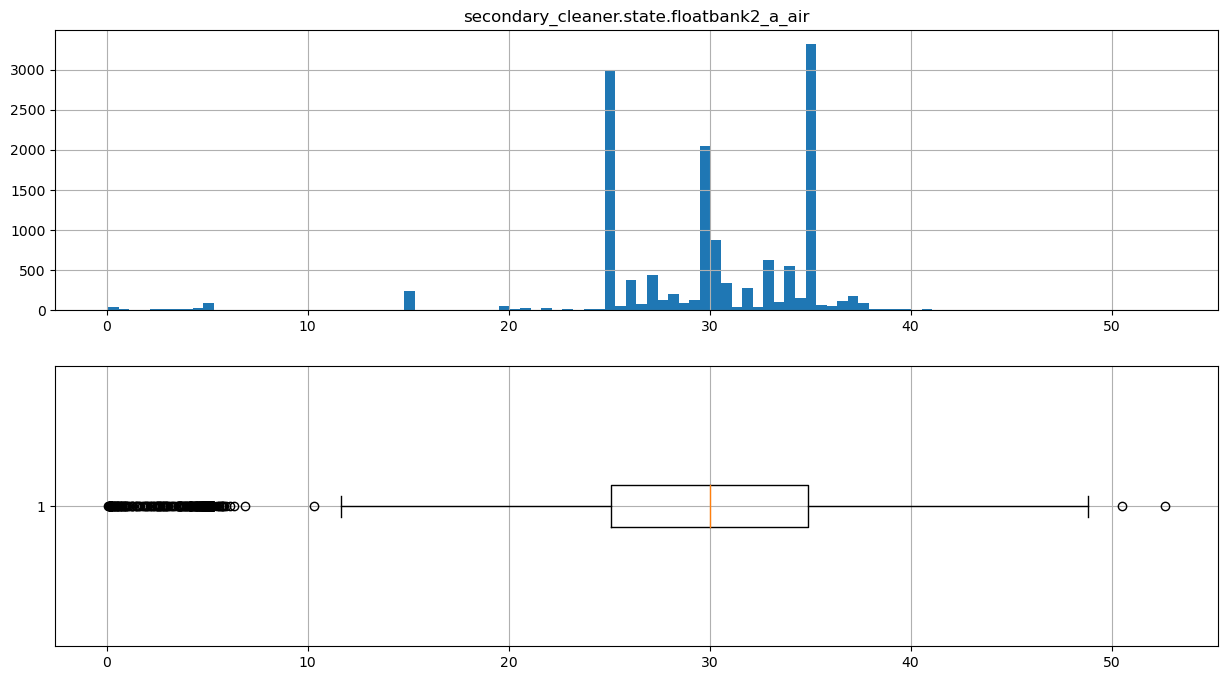

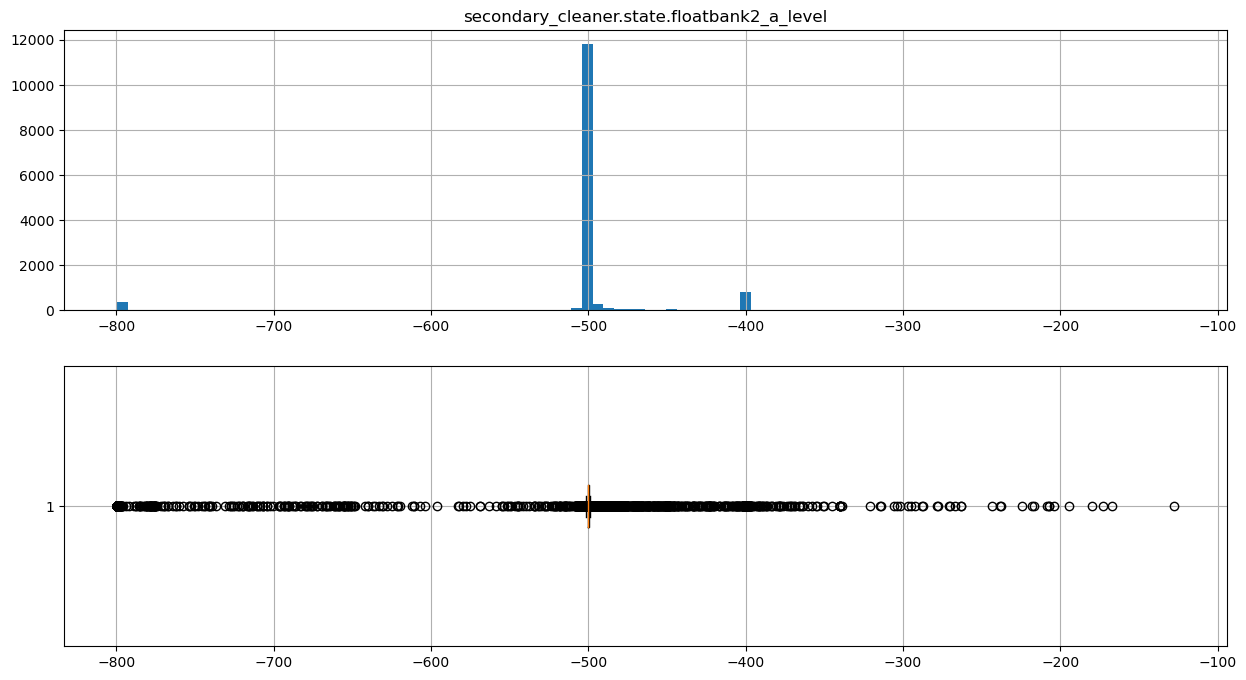

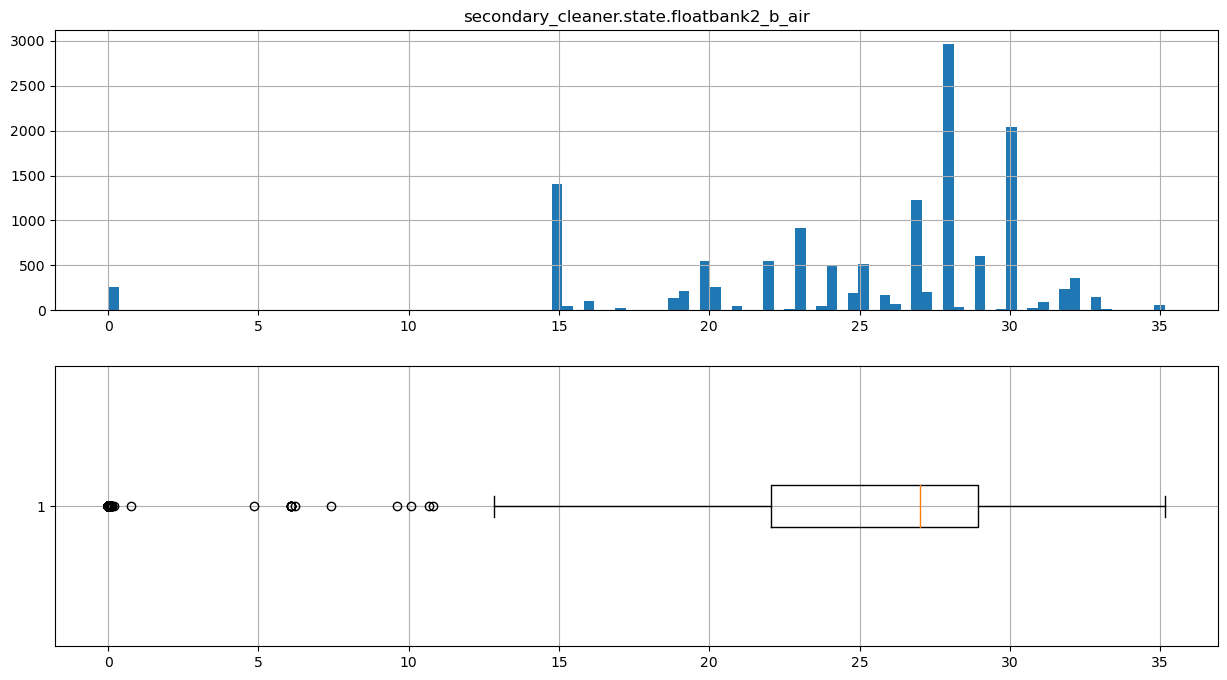

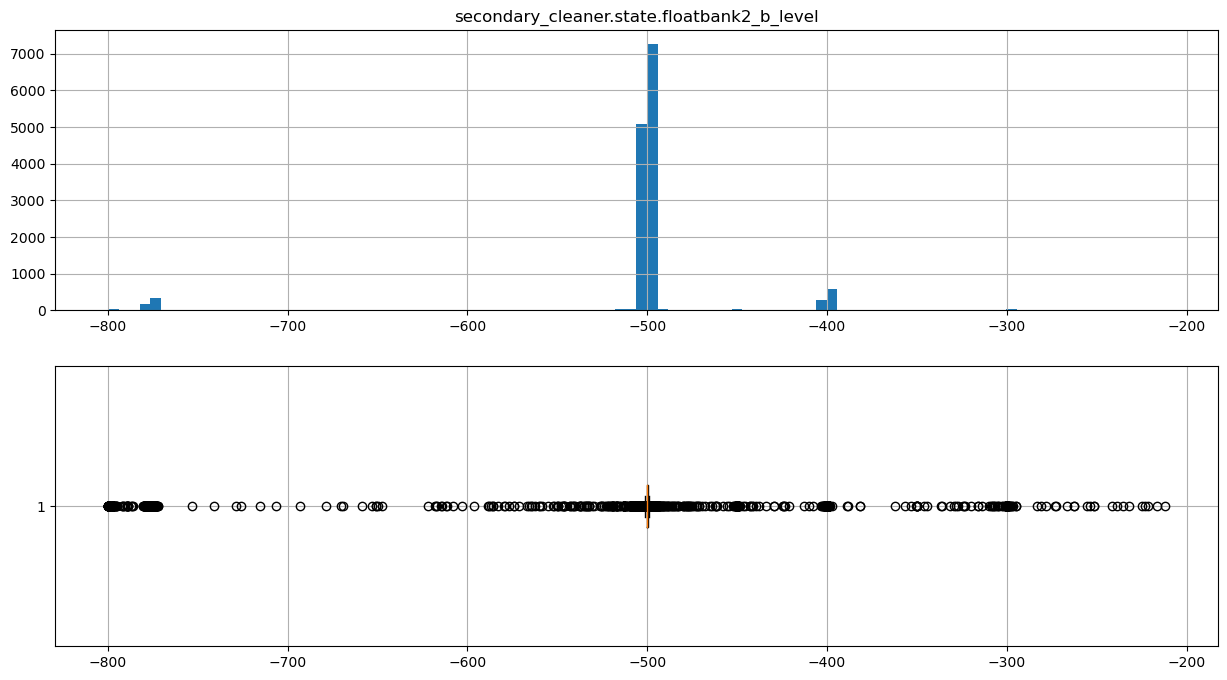

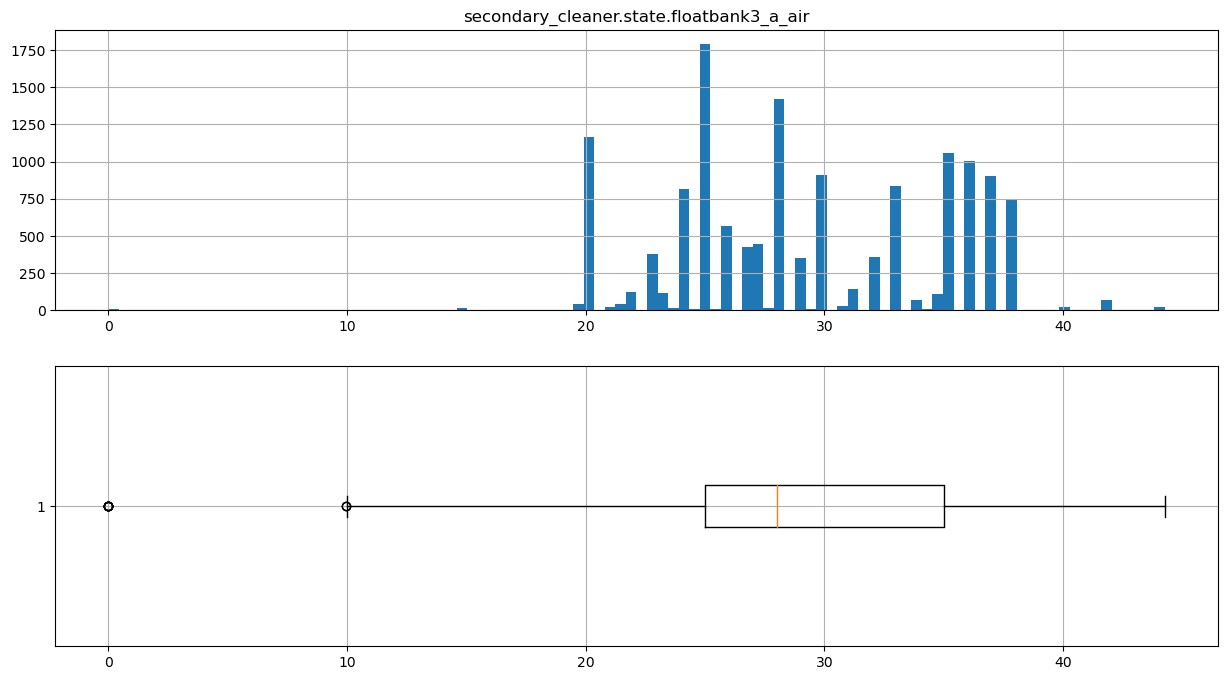

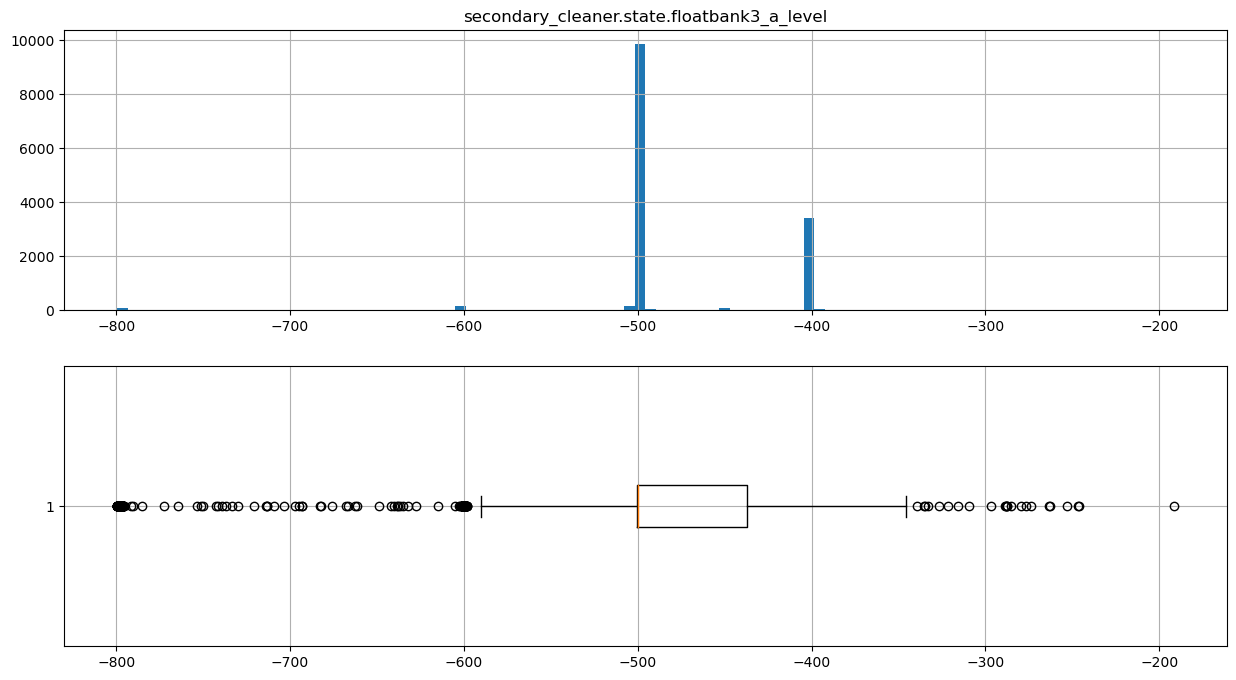

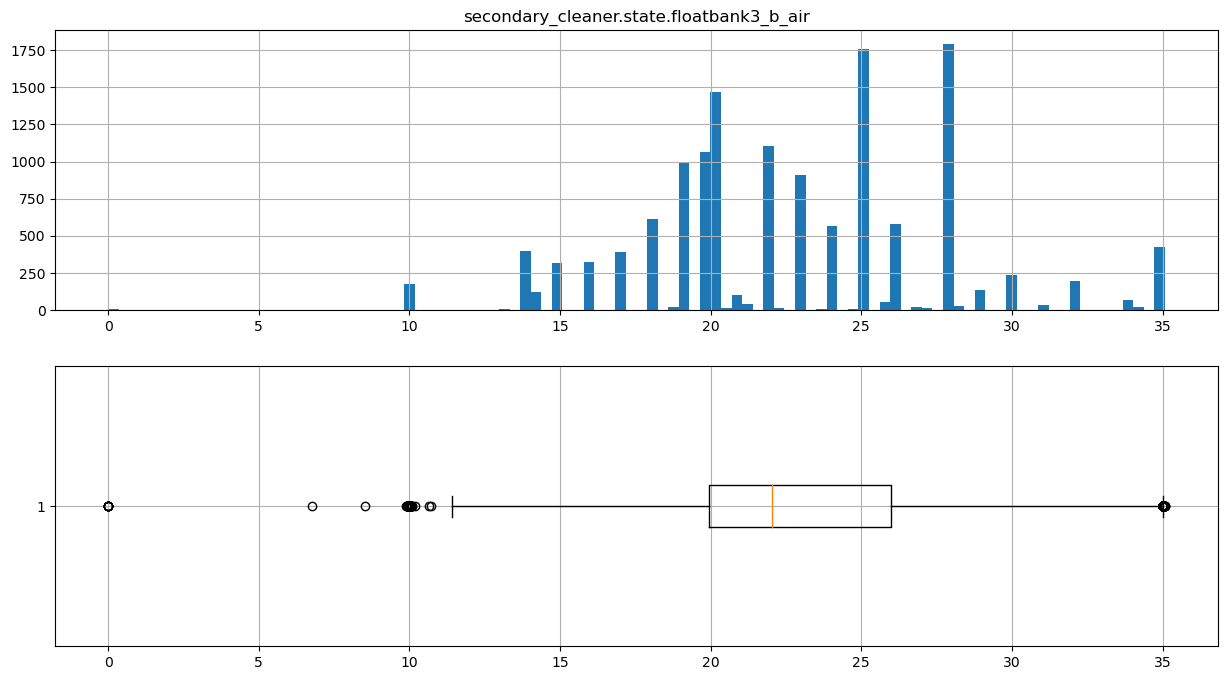

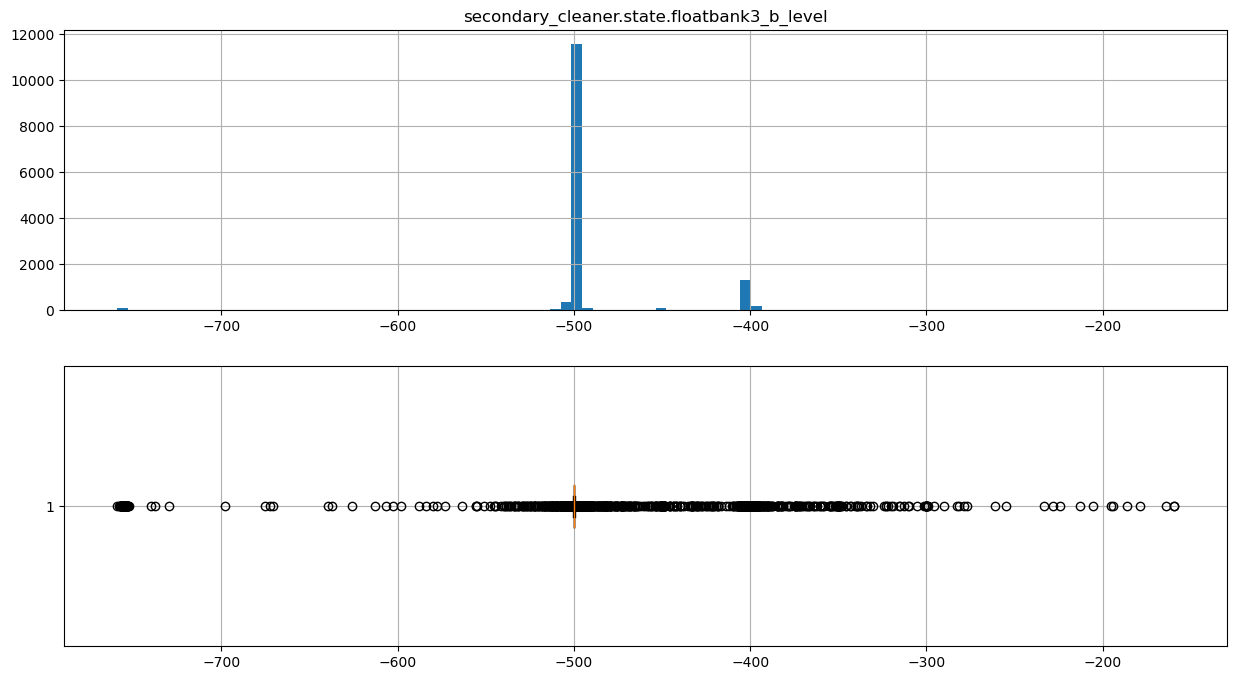

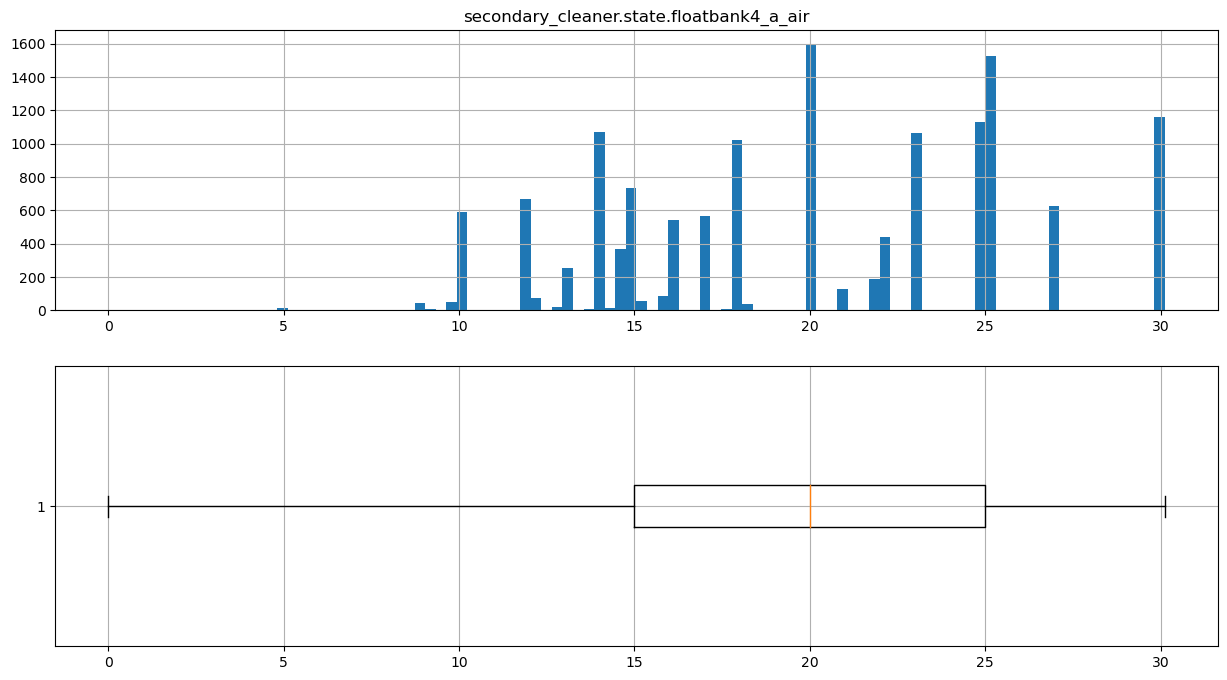

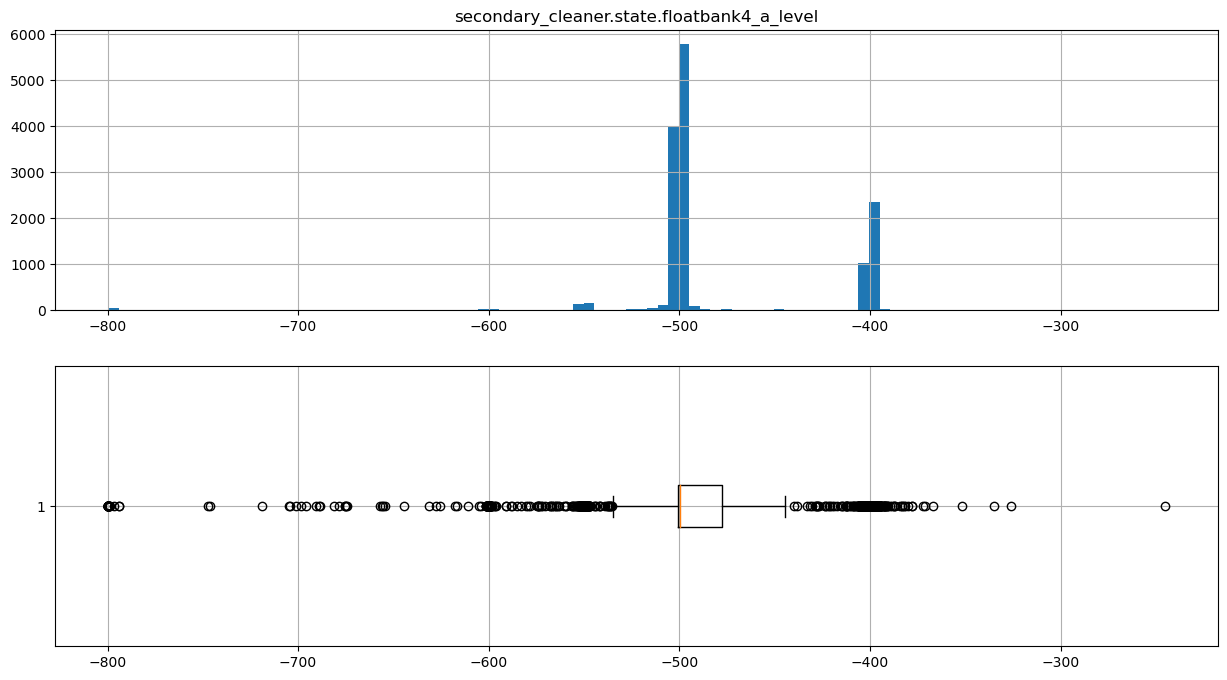

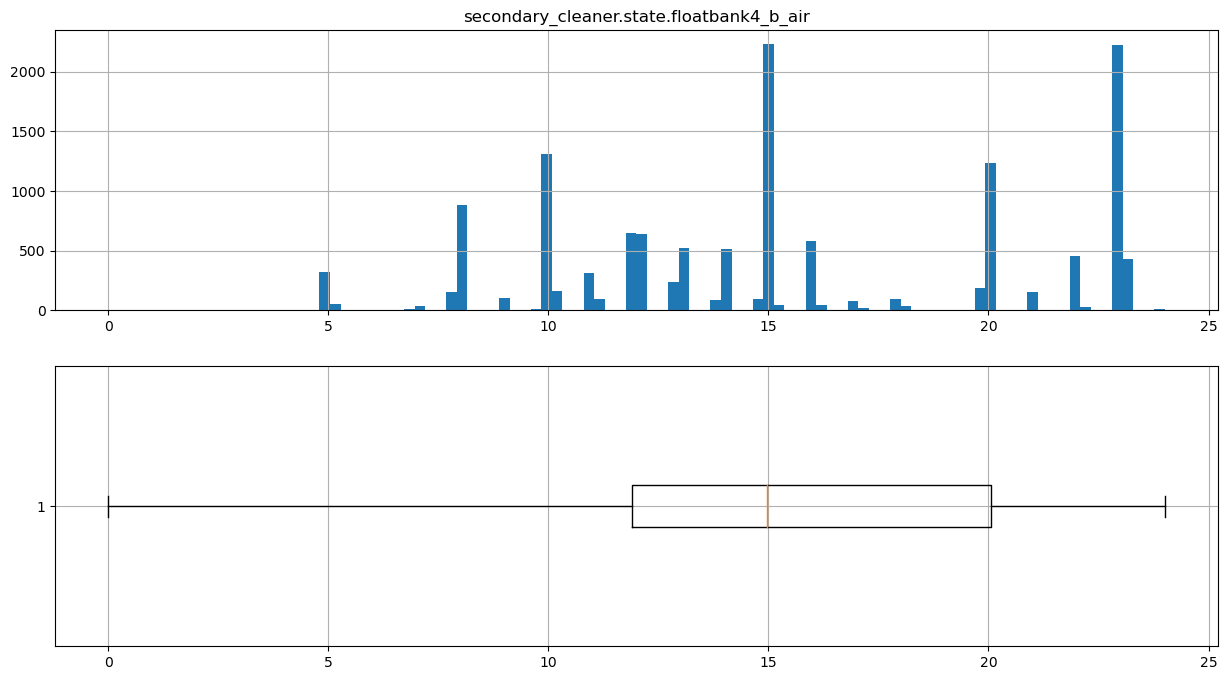

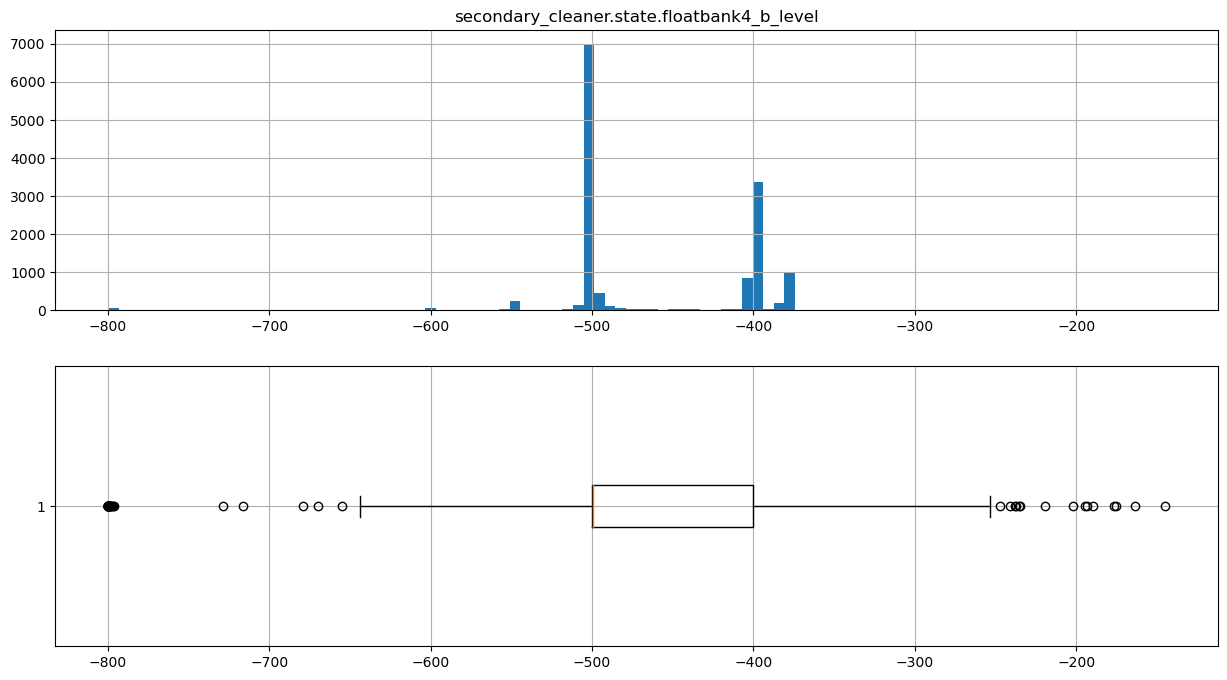

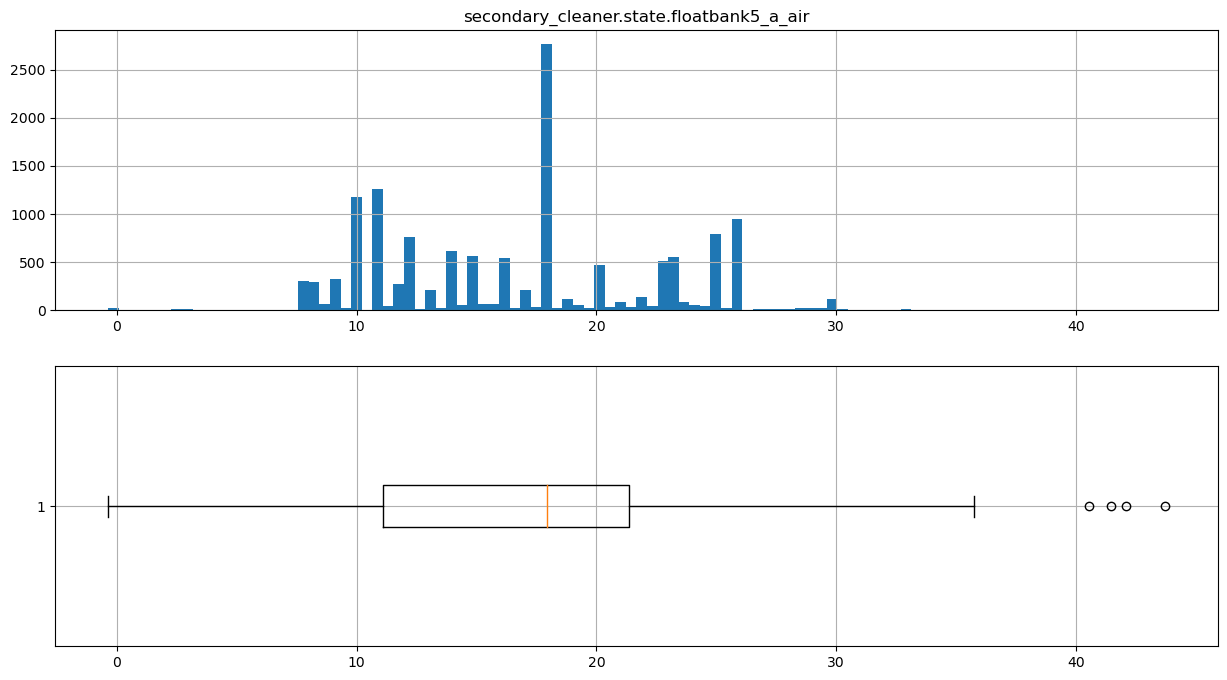

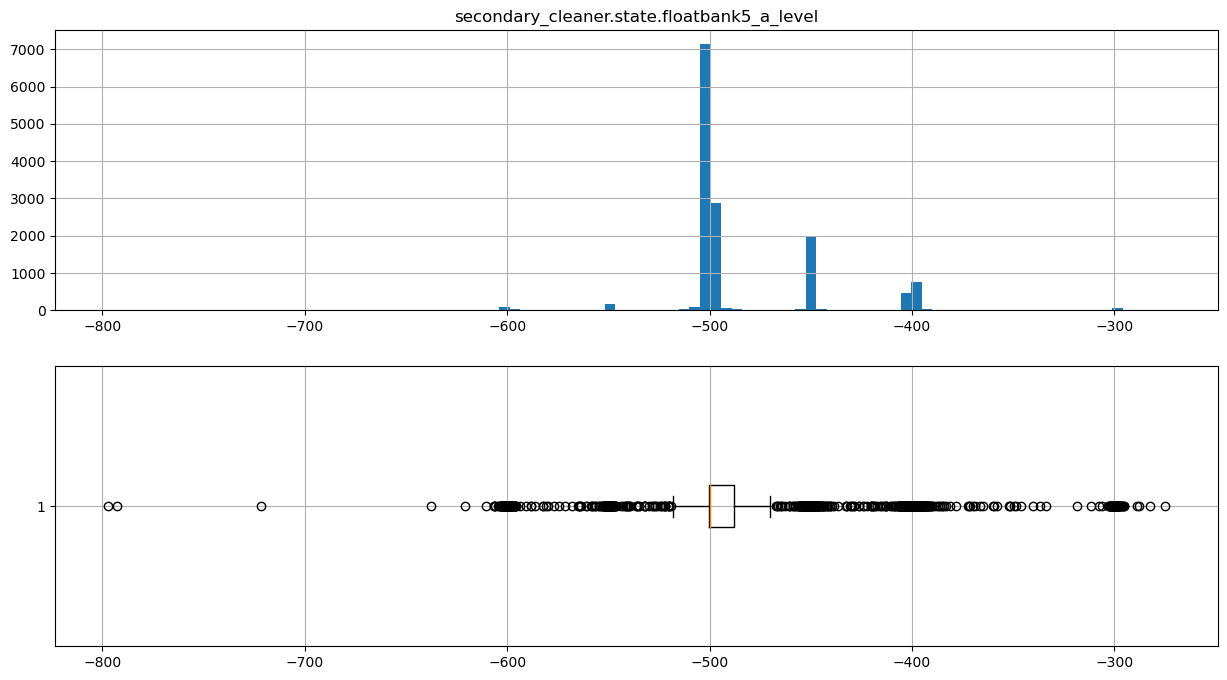

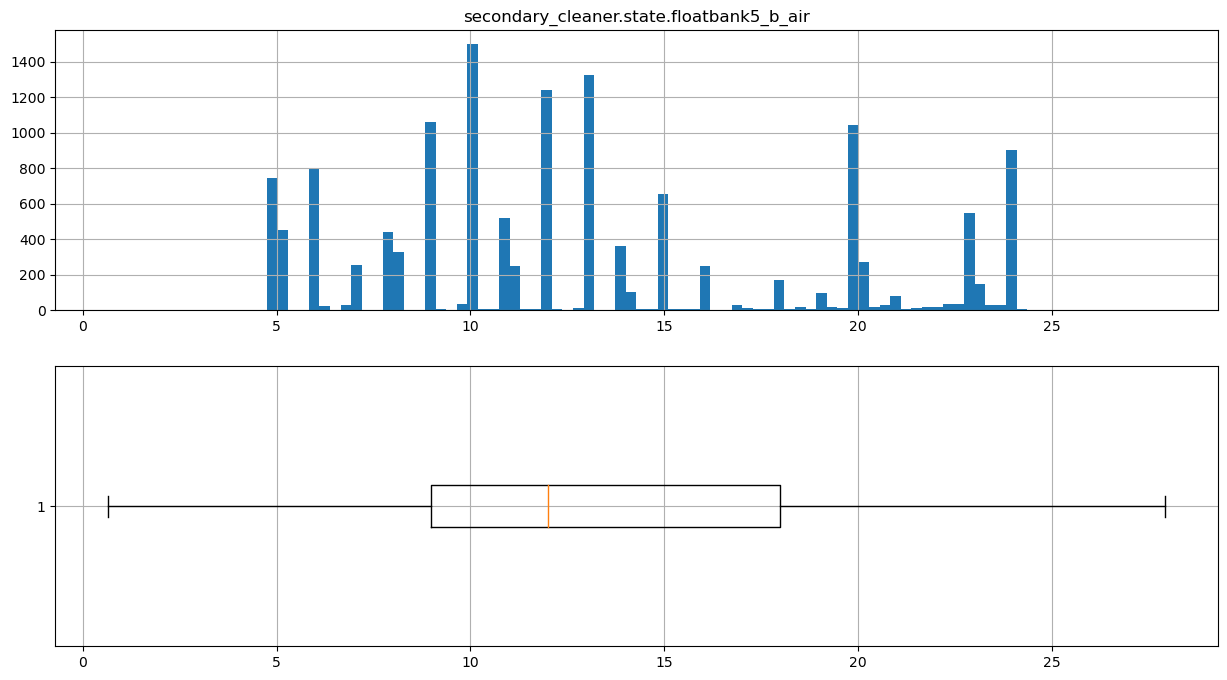

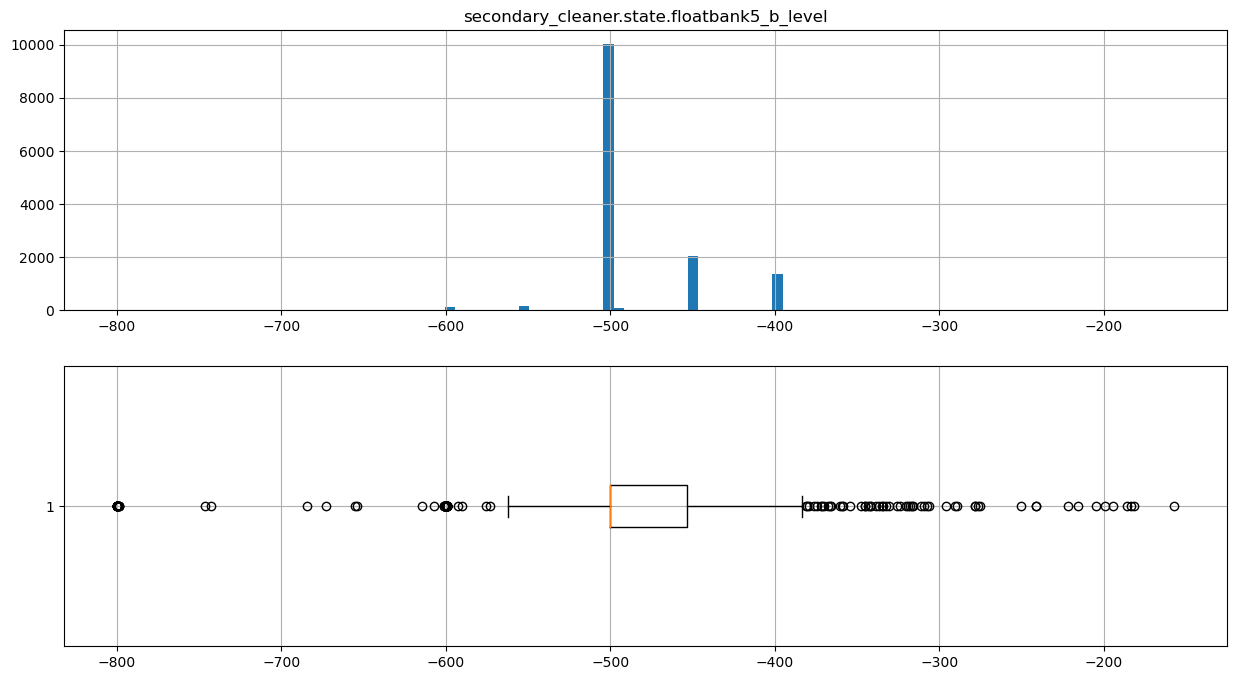

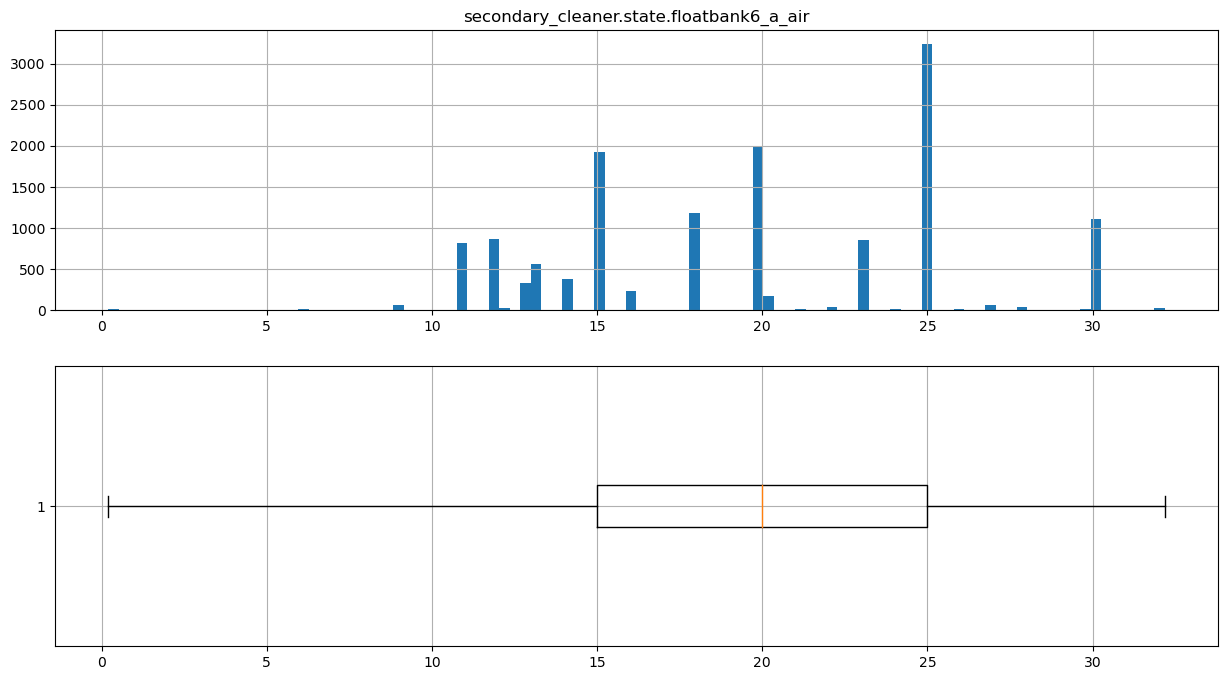

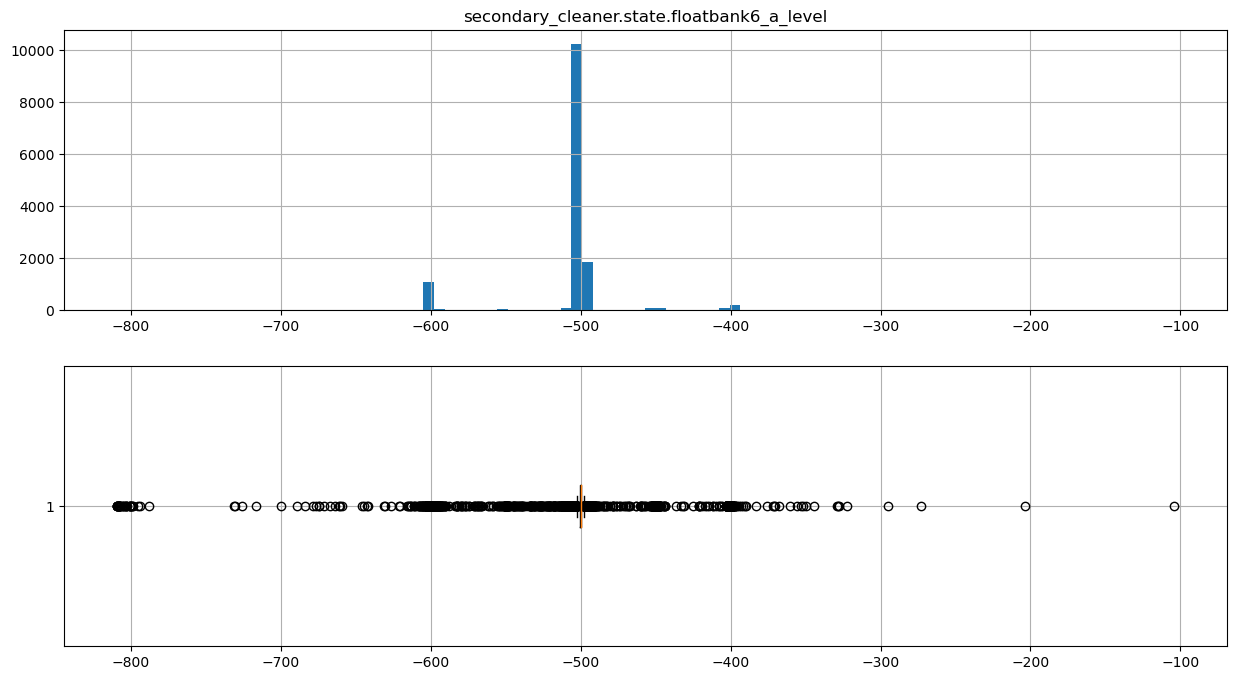

In [14]:
columns = test.drop('date', axis=1).columns
for col in columns:
    plt.figure(figsize=(15,8))
    plt.subplot(2,1,1)
    plt.hist(train[col], bins=100)
    plt.title(col)
    plt.grid()
    plt.subplot(2,1,2)
    plt.boxplot(train[col], vert=False)
    plt.grid()
    plt.show()

Не понятно, какие значения очевидные выбросы, а какие - нет. Поэтому удалять ничего не буду.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки


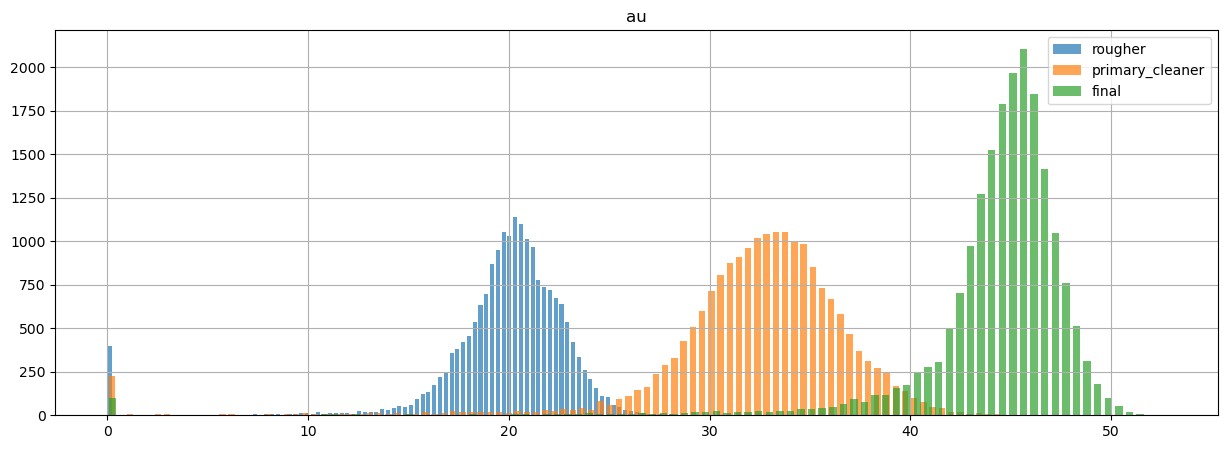

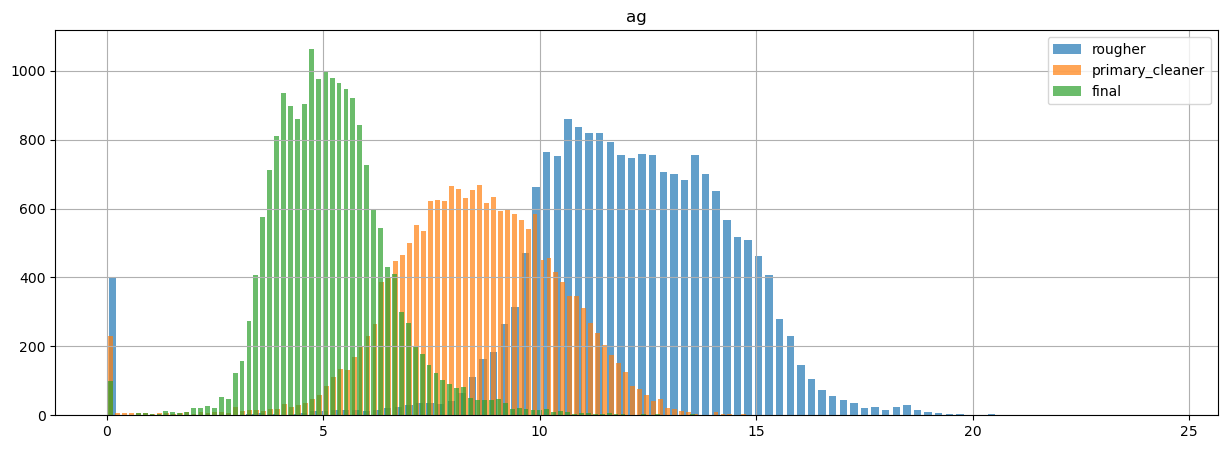

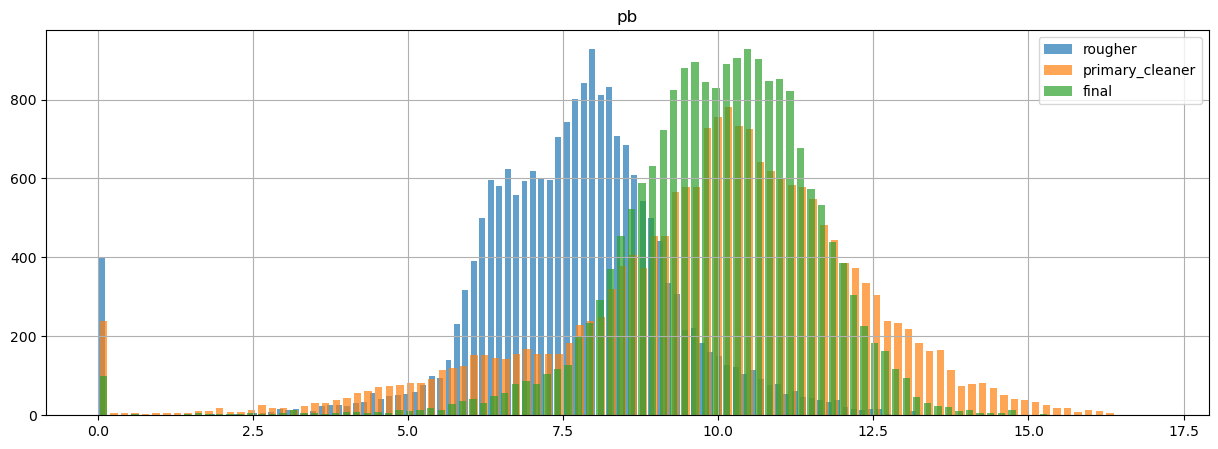

In [15]:
stages = ['rougher', 'primary_cleaner', 'final']
metals = ['au', 'ag', 'pb']

for metal in metals:
    plt.figure(figsize=(15,5))
    for stage in stages:
        plt.hist(full[f'{stage}.output.concentrate_{metal}'], bins=100, alpha=0.7, rwidth=0.7, label=stage)
    plt.title(metal)
    plt.grid()
    plt.legend()
    plt.show()

**Выводы**
- концентрация золота повышается с каждым следующим этапом очистки и на финальной стадии более чем в два раза превышает концентрацию после флоатинга
- концентрация серебра наоборот, падает в процессе очистки
- концентрация свинца всегда остается приблизительно постоянной

<div class="alert alert-block alert-success">
<b>Успех:</b> Отличная визуализация!
</div>

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

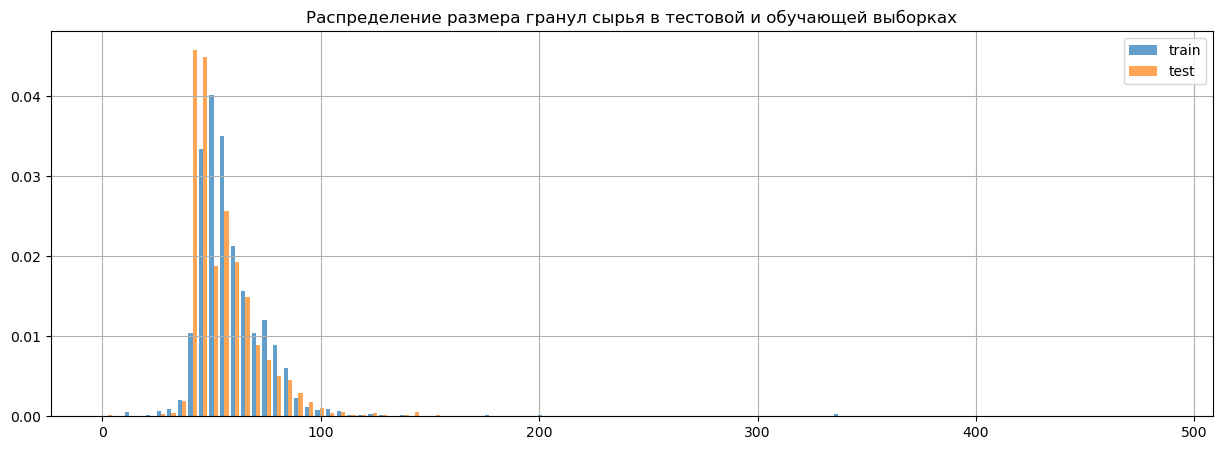

In [16]:
plt.figure(figsize=(15,5))
plt.hist([train['rougher.input.feed_size'], test['rougher.input.feed_size']], bins=100, alpha=0.7, density=True, label=['train','test'])
plt.legend()
plt.grid()
plt.title('Распределение размера гранул сырья в тестовой и обучающей выборках')
plt.show()

Распределения похожи, проблем нет.

### Исследование суммарной концентрации всех веществ на разных стадиях

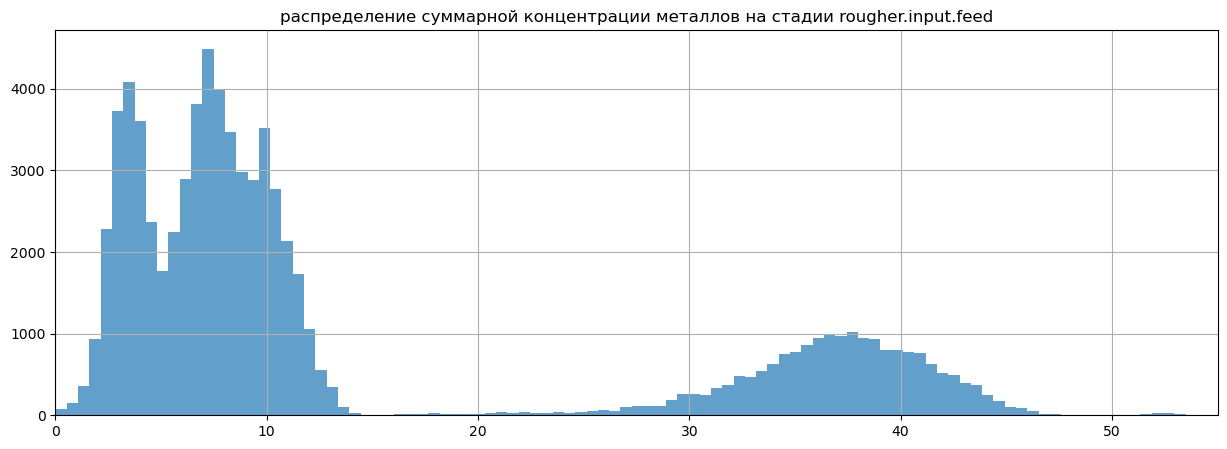

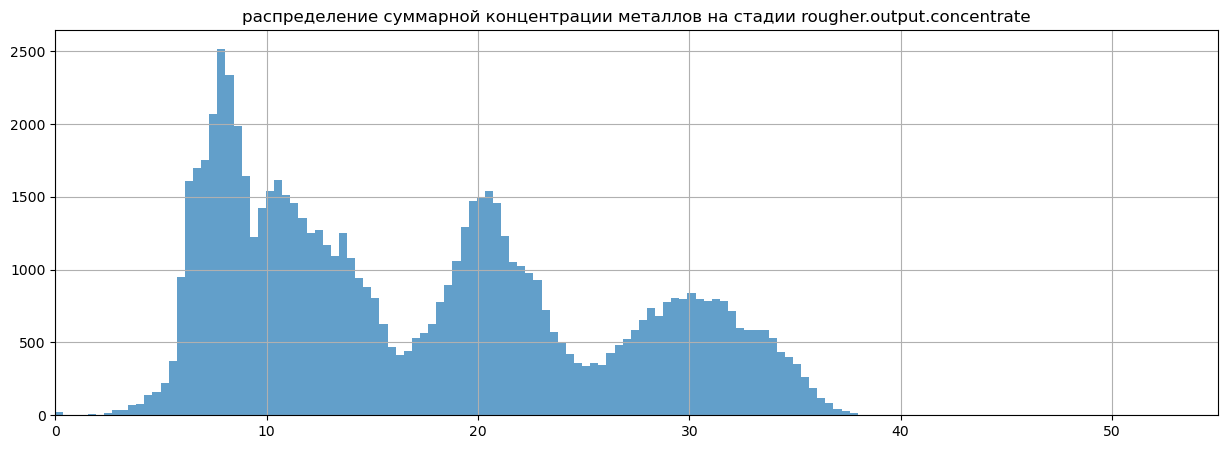

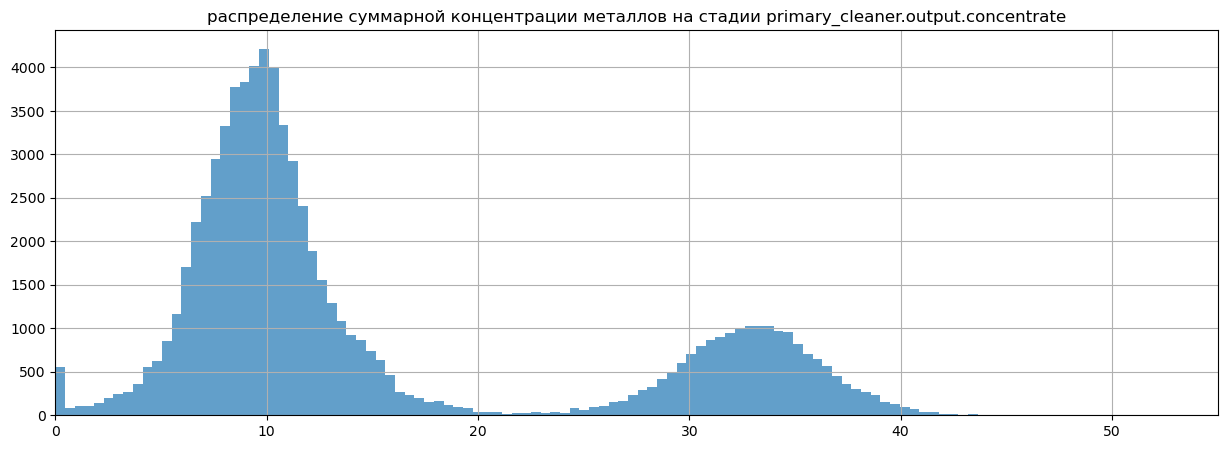

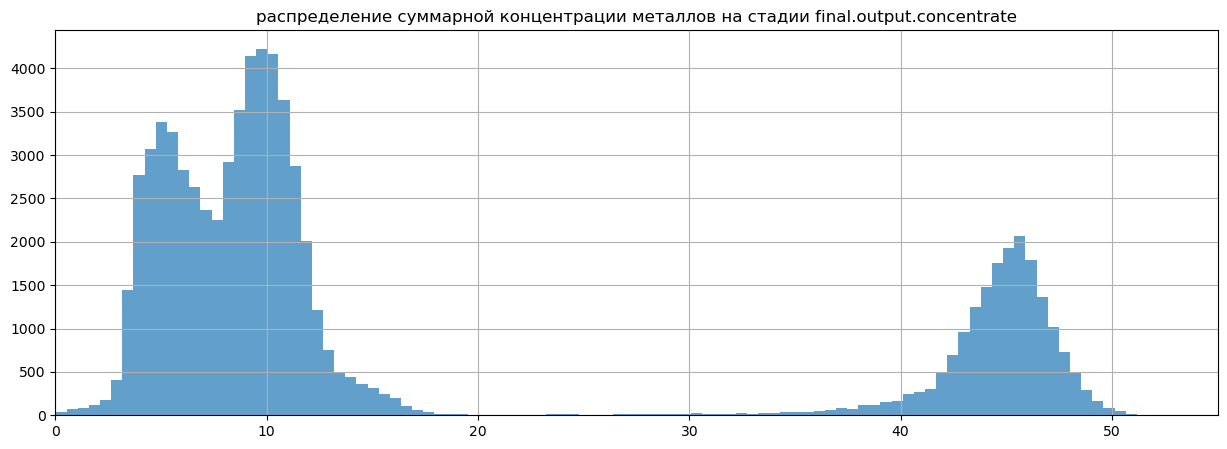

In [17]:
stages1 = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
metals = ['au', 'pb', 'sol', 'ag']

for stage in stages1:
    total_conc = []
    full = full[full[f'{stage}_{metal}']>0] # оставляем только больше нуля
    train = train[train[f'{stage}_{metal}']>0] # оставляем только больше нуля
    for metal in metals:
        total_conc += list(full[f'{stage}_{metal}'])
    plt.figure(figsize=(15,5))
    plt.hist(total_conc, bins=100, alpha=0.7)
    plt.title(f'распределение суммарной концентрации металлов на стадии {stage}')
    plt.xlim(0,55)
    plt.grid()
    plt.show()

**Вывод**<br>
В распределении суммарной концентрации можно выделить три пика, каждый соответсвует золоту, серебру или свинцу. После финальной стадии очистки, один из пиков заметно опережает по концентрации два других, оставшихся рядом с нулем, очевидно, максимальная концентрация соответствует золоту. Везде около нуля наблюдается всплеск, верятно, это артефакт. Удалять такие значения мы не будем, потому что эти данные все равно не будут задействованы в обучении модели.

## Модель

Подготовим выборки для обучения и тестирования. Так как таргета два, то и обучающих выборок будет две: для предсказания обогащения после флотации и после финальной очистки. Нет смысла засовывать в каждую выборку полный набор признаков, потому что, например, обогащение материала после флотации не может определяться параметрами, связанными с последующими этапами очистки сырья, которые происходят после флотации. Для тестирования тоже сделаем две выборки.

In [18]:
# почистим тестовую выборку от пропусков
test.dropna(inplace=True)

#сделаем дату индексами
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)
full.set_index('date', inplace=True)


train_rougher_target = train['rougher.output.recovery']
train_final_target = train['final.output.recovery']

test_rougher_target = full[full.index.isin(test.index)]['rougher.output.recovery']
test_final_target = full[full.index.isin(test.index)]['final.output.recovery']

# Удалим те признаки, которых нет в тестовой выборке.
train = train.drop(to_drop, axis=1)

# отберем признаки, относящиеся только к флотации
rougher_features = [x for x in train.columns if 'rough' in x]
train_rougher_features = train[rougher_features]
test_rougher_features = full[full.index.isin(test.index)][rougher_features]

# оставшиеся признаки запихнем во вторую обучающую выборку
final_features = list(set(train.columns) - set(rougher_features))
train_final_features = train[final_features]
test_final_features = full[full.index.isin(test.index)][final_features]

# проверка
# print(train_rougher_features.shape, train_rougher_target.shape, train_final_features.shape, train_final_target.shape)
# print(test_rougher_target.shape, test_rougher_features.shape)

Определяем функцию, рассчитывающаю sMAPE. Конструируем на ее основе скорер. 

In [19]:
def sMAPE(true, pred):
    return np.mean(2*abs(true-pred) / (abs(true)+abs(pred)))*100

sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

### Выбор и обучение модели<br>
Посмотрим что дает каждая модель при использовании кросс-валидации.

Линейная Регрессия

In [20]:
model_LR = LinearRegression()

sMAPE_LR_r = np.mean(cross_val_score(model_LR, train_rougher_features, train_rougher_target, scoring=sMAPE_scorer, cv=5))
sMAPE_LR_f = np.mean(cross_val_score(model_LR, train_final_features, train_final_target, scoring=sMAPE_scorer, cv=5))

print('LinReg total sMAPE:', 0.25*sMAPE_LR_r + 0.75*sMAPE_LR_f)
print(f'sMAPE rougher {sMAPE_LR_r}\nsMAPE final {sMAPE_LR_f}')

LinReg total sMAPE: -8.9250453461016
sMAPE rougher -6.523600118460732
sMAPE final -9.725527088648555


Дерево

In [21]:
%%time

model_tree = DecisionTreeRegressor(random_state=42)

sMAPE_tree_r = np.mean(cross_val_score(model_tree, train_rougher_features, train_rougher_target, scoring=sMAPE_scorer, cv=5))
sMAPE_tree_f = np.mean(cross_val_score(model_tree, train_final_features, train_final_target, scoring=sMAPE_scorer, cv=5))
print('Tree total sMAPE:', 0.25*sMAPE_tree_r + 0.75*sMAPE_tree_f)
print(f'sMAPE rougher {sMAPE_tree_r}\nsMAPE final {sMAPE_tree_f}')

Tree total sMAPE: -15.742931490403603
sMAPE rougher -8.994103436128588
sMAPE final -17.992540841828607
Wall time: 11.6 s


Лес

In [22]:
%%time
model_forest = RandomForestRegressor(random_state=42)

sMAPE_forest_r = np.mean(cross_val_score(model_forest, train_rougher_features, train_rougher_target, scoring=sMAPE_scorer, cv=5))
sMAPE_forest_f = np.mean(cross_val_score(model_forest, train_final_features, train_final_target, scoring=sMAPE_scorer, cv=5))
print('Forest total sMAPE:', 0.25*sMAPE_forest_r + 0.75*sMAPE_forest_f)
print(f'sMAPE rougher {sMAPE_forest_r}\nsMAPE final{sMAPE_forest_f}')

Forest total sMAPE: -10.849735636135243
sMAPE rougher -6.712856868625475
sMAPE final-12.228695225305167
Wall time: 14min 2s


In [32]:
%%time
model_forest = RandomForestRegressor(random_state=42)
param_forest = {
    'max_depth': range(2, 6),
    'min_samples_split': range(1, 4),
    'min_samples_leaf': range(1, 3),
    'n_estimators': range(45, 55, 1)
}

RS_forest_rougher = RandomizedSearchCV(model_forest,
                        param_distributions = param_forest,
                        scoring=sMAPE_scorer,
                        n_jobs=-1,
                  cv=5
)

RS_forest_final = RandomizedSearchCV(model_forest,
                              param_distributions = param_forest,
                        scoring=sMAPE_scorer,
                        n_jobs=-1,
                        cv=5
)

RS_forest_rougher.fit(train_rougher_features, train_rougher_target)
RS_forest_final.fit(train_final_features, train_final_target)

print('best params:', RS_forest_rougher.best_params_)


best params: {'n_estimators': 53, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5}
Wall time: 29.8 s


In [33]:
print('Forest total sMAPE:', 0.25*RS_forest_rougher.best_score_ + 0.75*RS_forest_final.best_score_)
print(f'sMAPE rougher {RS_forest_rougher.best_score_}\nsMAPE final{RS_forest_final.best_score_}')
print('best params:', RS_forest_rougher.best_params_)

Forest total sMAPE: -9.186570302933797
sMAPE rougher -6.658945123130633
sMAPE final-10.02911202953485
best params: {'n_estimators': 53, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5}


### Проверка лучшей модели на тестовой выборке

In [34]:
predictions_rougher = RS_forest_rougher.predict(test_rougher_features)
predictions_final = RS_forest_final.predict(test_final_features)

forest_smape = 0.25*sMAPE(test_rougher_target, predictions_rougher) + 0.75*sMAPE(test_final_target, predictions_final)
print ('sMAPE в лесу', forest_smape)

sMAPE в лесу 6.528604708354298


Теперь проверим модель на адекватность. Пусть модель предсказала везде медианное значение целевого признака. Посмотрим как изменится sMAPE.

In [36]:
rougher_median = pd.Series(train_rougher_target.median(), index=test_rougher_target.index)
final_median = pd.Series(train_final_target.median(), index=test_rougher_target.index)

dummy_smape = 0.25*sMAPE(test_rougher_target, rougher_median) + 0.75*sMAPE(test_final_target, final_median)
print ('sMAPE на константном предсказании', dummy_smape)

sMAPE на константном предсказании 7.268508748580271


**Вывод**<br>
    Лучшей моделью оказался лес, который на финальном тестировании выдал sMAPE 6,5 (а на константной модели sMAPE получилось 7.3)